# Сборный проект —2

**Описание проекта:**
Проект представляет собой исследовательскую и аналитическую задачу, направленную на оптимизацию управления персоналом в компании "Работа с Заботой". В рамках этого проекта мы строим модели машинного обучения, которые помогут HR-аналитикам быстрее и точнее прогнозировать уровень удовлетворённости сотрудников работой в компании, а также вероятность их увольнения.

**Цель:**

Целью проекта является создание моделей машинного обучения, способных предсказывать уровень удовлетворённости сотрудника и вероятность его увольнения на основе данных, предоставленных заказчиком. Это позволит компании принимать более обоснованные решения в области управления персоналом и минимизировать финансовые потери, связанные с оттоком сотрудников.

**Задачи:**
1. Построение модели, которая предсказывает уровень удовлетворенности сотрудника работой на основе предоставленных данных.
2. Разработка модели, которая предсказывает вероятность увольнения сотрудника из компании.


**План проекта для первой задачи:**
1. [Загрузка данных](#scrollTo=059de3cc)
2. [Предобработка данных](#scrollTo=579a7196)
3. [Исследовательский анализ данных](#scrollTo=18d00816)
4. [Подготовка данных](#scrollTo=b9cfb48b)
5. [Обучение модели](#scrollTo=0074867d)
7. [Предсказание на тестовой выборке](#scrollTo=ae8b0663)
8. [Анализ важности признаков](#scrollTo=06b02a9c)
6. [Выводы](#scrollTo=52bcb9df)

**План проекта для второй задачи:**
1. [Загрузка данных](#scrollTo=3d942fbb)
2. [Предобработка данных](#scrollTo=e5c24cce)
3. [Исследовательский анализ данных](#scrollTo=d47a3c32)
4. [Добавление нового входного признака](#scrollTo=46d3dc7e)
5. [Подготовка данных](#scrollTo=5dab747d)
6. [Обучение модели](h#scrollTo=f443a290)
7. [Выводы](#scrollTo=d2119b96)

## Задача 1: предсказание уровня удовлетворённости сотрудника

### Загрузка данных

In [1]:
# !pip install --upgrade numpy scipy numba -q

In [2]:
!pip install phik -q

In [3]:
# !pip install scikit-learn==1.4.2 -q

In [4]:
!pip install shap -q

In [5]:
# !pip install shap --upgrade -q

In [6]:
# !pip install  matplotlib --upgrade -q

In [7]:
# !pip install  seaborn --upgrade -q

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import phik
import pylab
import shap

from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import shapiro
from io import StringIO

from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import f1_score, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import make_scorer
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import StratifiedKFold

TEST_SIZE = 0.25
RANDOM_STATE = 42

In [9]:
train_data_one = pd.read_csv("/content/train_job_satisfaction_rate.csv")
test_features_one = pd.read_csv("/content/test_features.csv")
test_target_one = pd.read_csv("/content/test_target_job_satisfaction_rate.csv")

In [10]:
train_data_one.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20


1. id — уникальный идентификатор сотрудника;
2. dept — отдел, в котором работает сотрудник;
3. level — уровень занимаемой должности;
4. workload — уровень загруженности сотрудника;
5. employment_years — длительность работы в компании (в годах);
6. last_year_promo — показывает, было ли повышение за последний год;
7. last_year_violations — показывает, нарушал ли сотрудник трудовой договор за последний год;
8. supervisor_evaluation — оценка качества работы сотрудника, которую дал руководитель;
9. salary — ежемесячная зарплата сотрудника;
10. job_satisfaction_rate — уровень удовлетворённости сотрудника работой в компании, целевой признак.

In [11]:
train_data_one.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB


In [12]:
test_features_one.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800


In [13]:
test_features_one.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


In [14]:
test_target_one.head()

,id,job_satisfaction_rate
0,130604,0.74
1,825977,0.75
2,418490,0.60
3,555320,0.72
4,826430,0.08


In [15]:
test_target_one.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


<div style="border: 2px solid #DABDAB; border-radius: 5px; padding: 10px; color: #45322E; background-color#FFF0FC;">
<p> Вывод: формат таблиц корректный. Есть пропуски, которые следует проанализировать и выбрать стратегию обработки.  </p>
</div>

### Предобработка данных

#### Поиск и обработка дубликатов

In [16]:
def duplicates_df(df,name):
    duplicates = df[df.duplicated()]
    if  duplicates.empty:
        print(f'Явных дубликатов для {name} не обнаружено.')
    else:
        print(f'Обнаружены явные дубликаты для {name}:')
    return

In [17]:
duplicates_df(train_data_one,'train_data_one')

Явных дубликатов для train_data_one не обнаружено.


In [18]:
def hidden_duplicates_df(df,name,subset):
    unique_df = df.drop_duplicates(subset=subset)
    duplicates = len(df) - len(unique_df)
    if len(df) == len(unique_df):
        print(f'нет неявных дубликатов в датафрейме {name}')
    else:
        print(f'есть неявные дубликаты в датафрейме {name}, кол-во дубликатов: {duplicates}')

In [19]:
hidden_duplicates_df(train_data_one,'train_data_one', ['id','dept'])

нет неявных дубликатов в датафрейме train_data_one


In [20]:
def analyze_column(df):
    results = {}
    for col in df.columns:
        if df[col].dtype == 'object':
            unique_values = df[col].unique()
            num_unique_values = df[col].nunique()
            value_counts = df[col].value_counts()
            results[col] = (unique_values, num_unique_values, value_counts)

    return results

In [21]:
results = analyze_column(train_data_one)
for col, (unique_values, num_unique_values, value_counts) in results.items():
    print(f"\n Анализ столбца '{col}':")
    print("\n Уникальные значения:", unique_values)
    print("Количество уникальных значений:", num_unique_values)
    print("Частота уникальных значений:")
    print(value_counts)


 Анализ столбца 'dept':

 Уникальные значения: ['sales' 'hr' 'technology' 'purchasing' 'marketing' nan]
Количество уникальных значений: 5
Частота уникальных значений:
dept
sales         1512
technology     866
purchasing     610
marketing      550
hr             456
Name: count, dtype: int64

 Анализ столбца 'level':

 Уникальные значения: ['junior' 'middle' 'sinior' nan]
Количество уникальных значений: 3
Частота уникальных значений:
level
junior    1894
middle    1744
sinior     358
Name: count, dtype: int64

 Анализ столбца 'workload':

 Уникальные значения: ['medium' 'high' 'low']
Количество уникальных значений: 3
Частота уникальных значений:
workload
medium    2066
low       1200
high       734
Name: count, dtype: int64

 Анализ столбца 'last_year_promo':

 Уникальные значения: ['no' 'yes']
Количество уникальных значений: 2
Частота уникальных значений:
last_year_promo
no     3880
yes     120
Name: count, dtype: int64

 Анализ столбца 'last_year_violations':

 Уникальные значения: 

In [22]:
train_data_one['level'].replace({"sinior" : "senior"}, inplace=True)
print(train_data_one['level'].unique())

['junior' 'middle' 'senior' nan]


<ipython-input-22-5ff05d585280>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data_one['level'].replace({"sinior" : "senior"}, inplace=True)


In [23]:
test_features_one['level'].replace({"sinior" : "senior"}, inplace=True)
print(test_features_one['level'].unique())

['junior' 'middle' 'senior' nan]


<ipython-input-23-d09c79a0880c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_features_one['level'].replace({"sinior" : "senior"}, inplace=True)


<div style="border: 2px solid #DABDAB; border-radius: 5px; padding: 10px; color: #45322E; background-color#FFF0FC;">
<p> Вывод: На данном этапе, обнаружена только проблема с пропусками и исправлена текстовая ошибка в столбце .  </p>
</div>

### Исследовательский анализ данных

#### Исследовательский анализ числовых данных для таблицы ***train_data_one***

In [24]:
# Проведем анализ числовых признаков
train_data_one.describe()

,id,employment_years,supervisor_evaluation,salary,job_satisfaction_rate
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,544957.621000,3.718500,3.476500,33926.700000,0.533995
std,257883.104622,2.542513,1.008812,14900.703838,0.225327
min,100954.000000,1.000000,1.000000,12000.000000,0.030000
25%,322836.750000,2.000000,3.000000,22800.000000,0.360000
50%,534082.500000,3.000000,4.000000,30000.000000,0.560000
75%,771446.000000,6.000000,4.000000,43200.000000,0.710000
max,999521.000000,10.000000,5.000000,98400.000000,1.000000


<div style="border: 2px solid #DABDAB; border-radius: 5px; padding: 10px; color: #45322E; background-color#FFF0FC;">
<p> Вывод: Сотрудники в среднем работают в компании 3 года, максимальный стаж 10 лет, 25 % сотрудников работают не более 2х лет есть предположение, что отток
сотрудников выше среднего, но для вывода требуется информации в среднем по отросли, возможно это нормально для hr компании. Удовлетворенность сотрудников средняя. </p>
</div>

In [25]:
def plot_distribution(df, column_name ,bins=30, color='#20B2AA' ):
    plt.figure(figsize=(9, 5))
    sns.histplot(df[column_name], bins=bins, kde=True, color=color)
    plt.title(f'Распределение {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Частота')
    plt.grid(True)

    plt.figure(figsize=(9, 5))
    sns.boxplot(data=df, x=column_name, color='skyblue')
    plt.title(f'Распределение {column_name}')
    plt.xlabel(column_name)
    plt.grid(True)
    plt.show()

#####  Анализ длительности работы в компании (в годах)

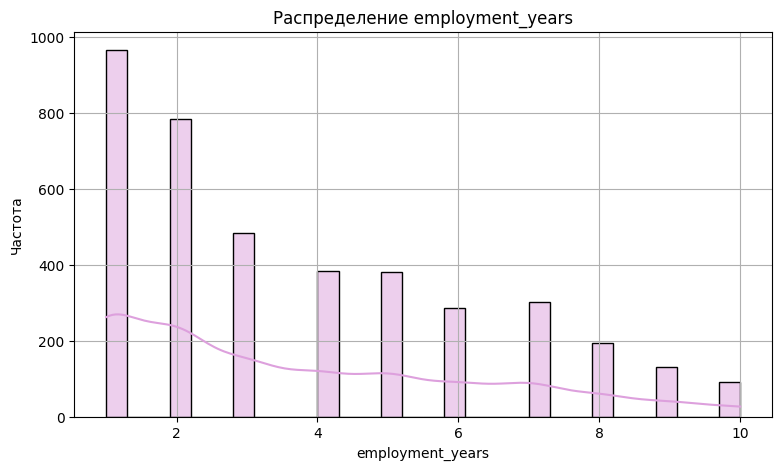

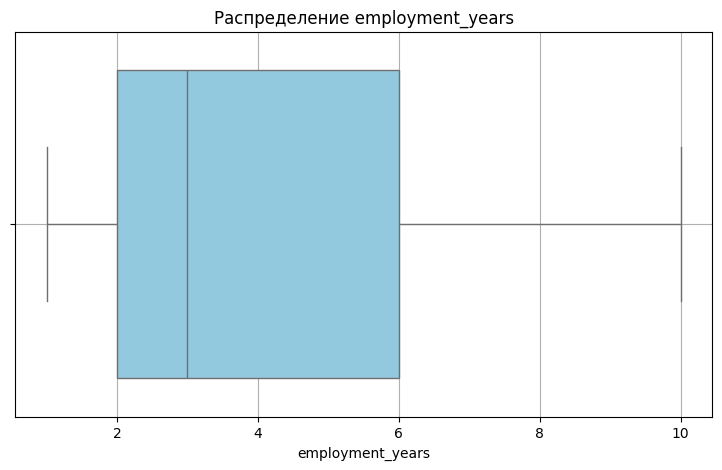

In [26]:
plot_distribution(train_data_one, 'employment_years', color='#DDA0DD')

<div style="border: 2px solid #DABDAB; border-radius: 5px; padding: 10px; color: #45322E; background-color#FFF0FC;">
<p>
    Вывод: В распределении сроков работы сотрудников наблюдается сильное смещение влево, при этом пик расположен в значении 1 года. Это указывает на то, что большинство сотрудников работают в компании относительно недолго. Есть две возможные интерпретации этого факта:

1. *Молодые сотрудники преобладают в компании.* Это может быть связано с тем, что компания активно нанимает молодых специалистов или студентов на стажировки.

2. *Сильная текучка кадров.* Пик в значении 1 года может указывать на то, что большинство сотрудников покидают компанию в течение первого года работы.

Для более точного определения причины смещения влево и пика в значении 1 года необходима информация из других столбцев в таблице .</p>
</div>

#####  Анализ  оценки качества работы сотрудника, которую дал руководитель.

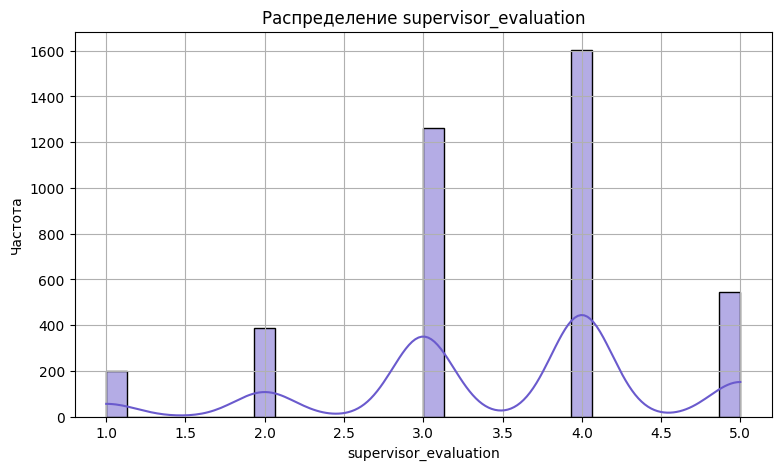

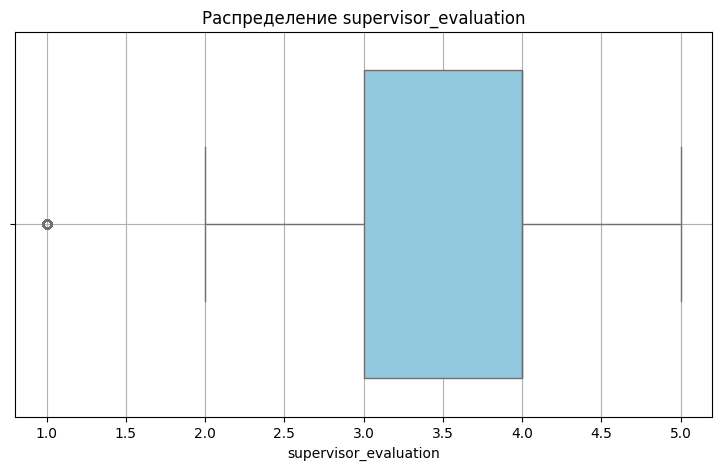

In [27]:
plot_distribution(train_data_one, 'supervisor_evaluation', color='#6A5ACD')

<div style="border: 2px solid #DABDAB; border-radius: 5px; padding: 10px; color: #45322E; background-color#FFF0FC;">
<p>
    Вывод: На графике представлен узкий диапазон значений, от 1 до 5, а так же является дискретным. Видно, что руководители чаще всего удовлетворены сотрудникам, оценка 1, редкость, но не аномалия. Можно преобразовать данный признак в категорию.</p>
</div>

#####  Анализ  зарплаты.

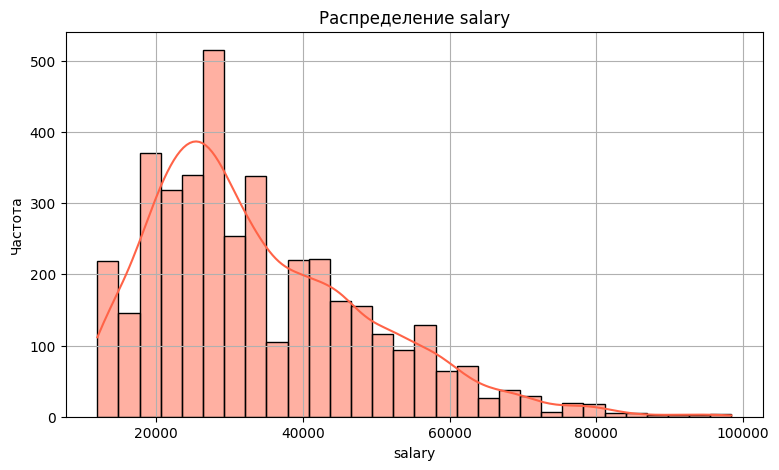

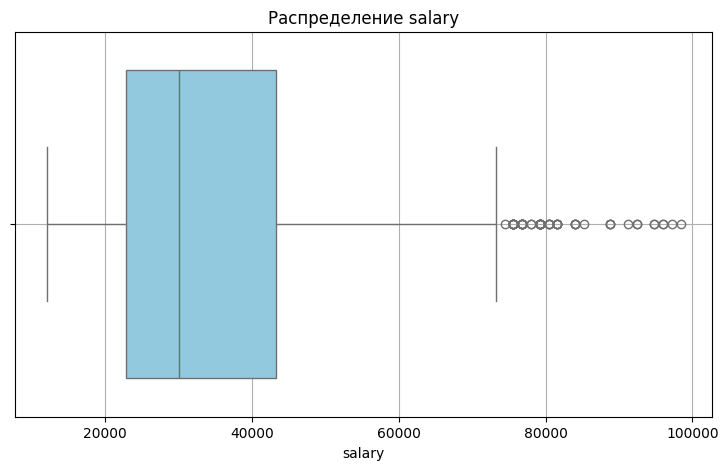

In [28]:
plot_distribution(train_data_one, 'salary', color='#FF6347')

<div style="border: 2px solid #DABDAB; border-radius: 5px; padding: 10px; color: #45322E; background-color#FFF0FC;">
<p>
    Вывод: Наблюдается смещение распределения зарплат влево, с пиком около значения примерно 30 тыс. рублей. Значения за пределами отметки в 75 тыс. рублей составляют редкость для данной компании. Это указывает на то, что большинство сотрудников получают зарплату, которая ближе к нижнему диапазону внутри компании.</p>
</div>

#####  Анализ  уровеня удовлетворённости сотрудника работой в компании, целевой признак.

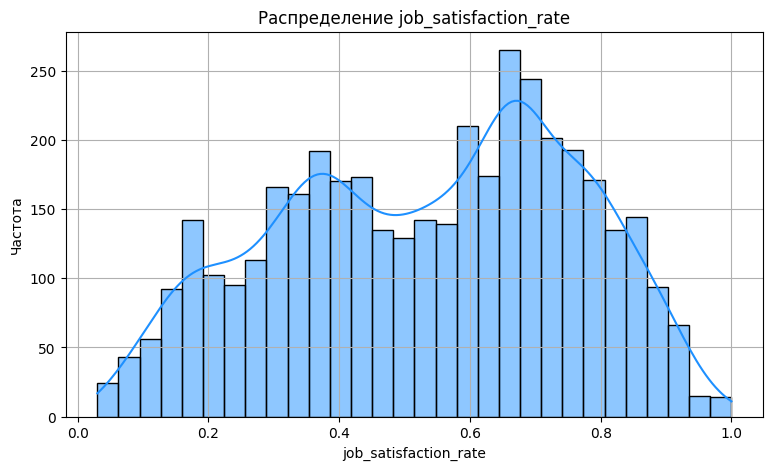

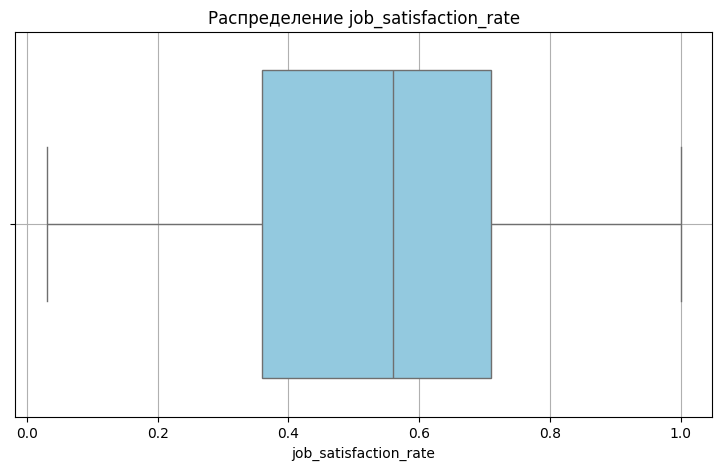

In [29]:
plot_distribution(train_data_one, 'job_satisfaction_rate', color='#1E90FF')

<div style="border: 2px solid #DABDAB; border-radius: 5px; padding: 10px; color: #45322E; background-color#FFF0FC;">
<p>
    Вывод: Наблюдается пик значений около 0.65, что указывает на высокий уровень удовлетворенности сотрудников. Однако также наблюдается значительное количество значений в диапазоне от 0.0 до 0.4, что может сигнализировать о недовольстве среди некоторых сотрудников.</p>
</div>

##### Анализ категориальных данных

In [30]:
def explore_cat_columns(df):
    cat_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

    for column in cat_columns:
        print(f"Анализ категориального столбца '{column}':")
        print("Уникальные значения:")
        print(df[column].unique())
        print("Количество уникальных значений:", len(df[column].unique()))
        print("Распределение значений:")
        print(df[column].value_counts())
        plt.figure(figsize=(10, 6))
        # Устанавливаем column как hue и отключаем legend
        sns.countplot(data=df, x=column, hue=column, order=df[column].value_counts().index, palette='pastel', dodge=False, legend=False)
        plt.title(f'Распределение значений в столбце {column}')
        plt.xlabel(column)
        plt.ylabel('Количество')
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.show()
        print("\n")

Анализ категориального столбца 'dept':
Уникальные значения:
['sales' 'hr' 'technology' 'purchasing' 'marketing' nan]
Количество уникальных значений: 6
Распределение значений:
dept
sales         1512
technology     866
purchasing     610
marketing      550
hr             456
Name: count, dtype: int64


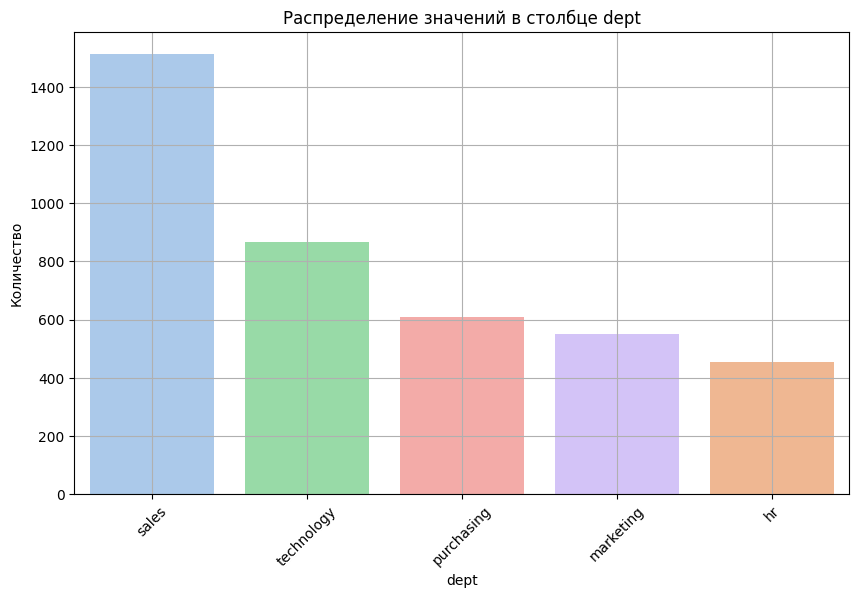



Анализ категориального столбца 'level':
Уникальные значения:
['junior' 'middle' 'senior' nan]
Количество уникальных значений: 4
Распределение значений:
level
junior    1894
middle    1744
senior     358
Name: count, dtype: int64


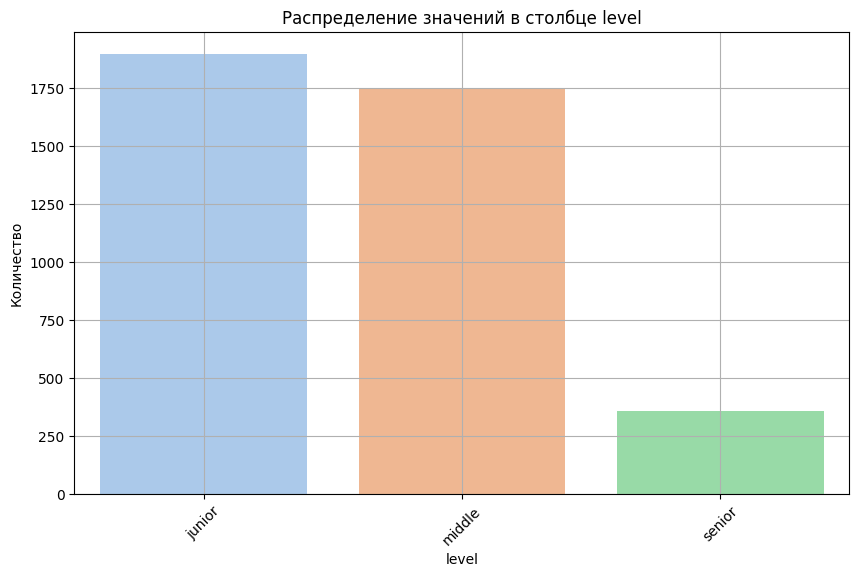



Анализ категориального столбца 'workload':
Уникальные значения:
['medium' 'high' 'low']
Количество уникальных значений: 3
Распределение значений:
workload
medium    2066
low       1200
high       734
Name: count, dtype: int64


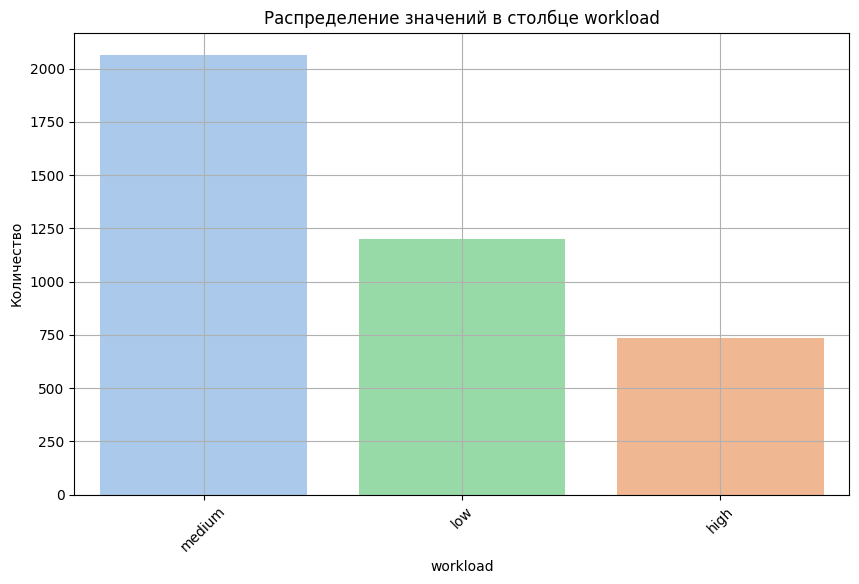



Анализ категориального столбца 'last_year_promo':
Уникальные значения:
['no' 'yes']
Количество уникальных значений: 2
Распределение значений:
last_year_promo
no     3880
yes     120
Name: count, dtype: int64


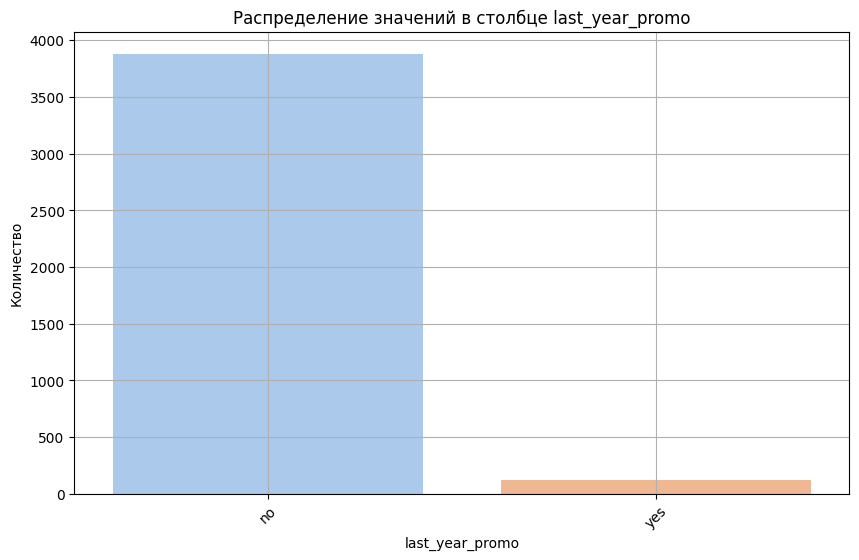



Анализ категориального столбца 'last_year_violations':
Уникальные значения:
['no' 'yes']
Количество уникальных значений: 2
Распределение значений:
last_year_violations
no     3441
yes     559
Name: count, dtype: int64


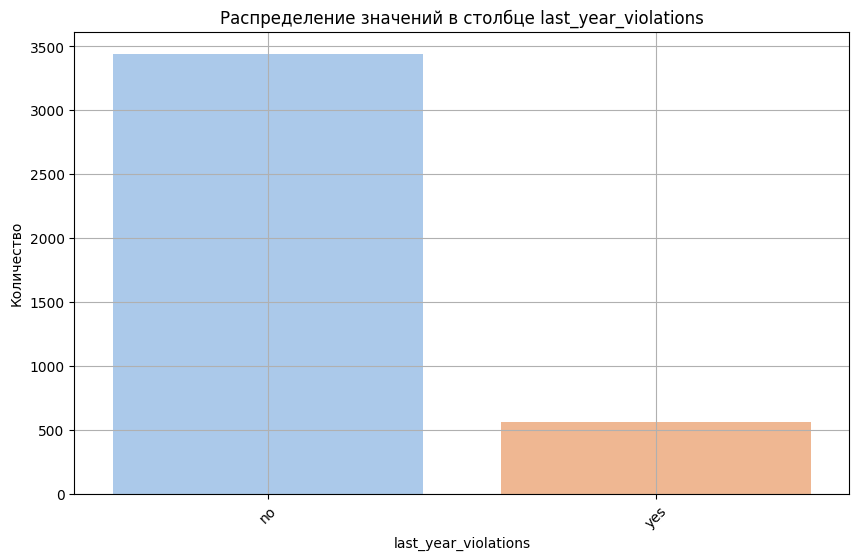

In [31]:
explore_cat_columns(train_data_one)

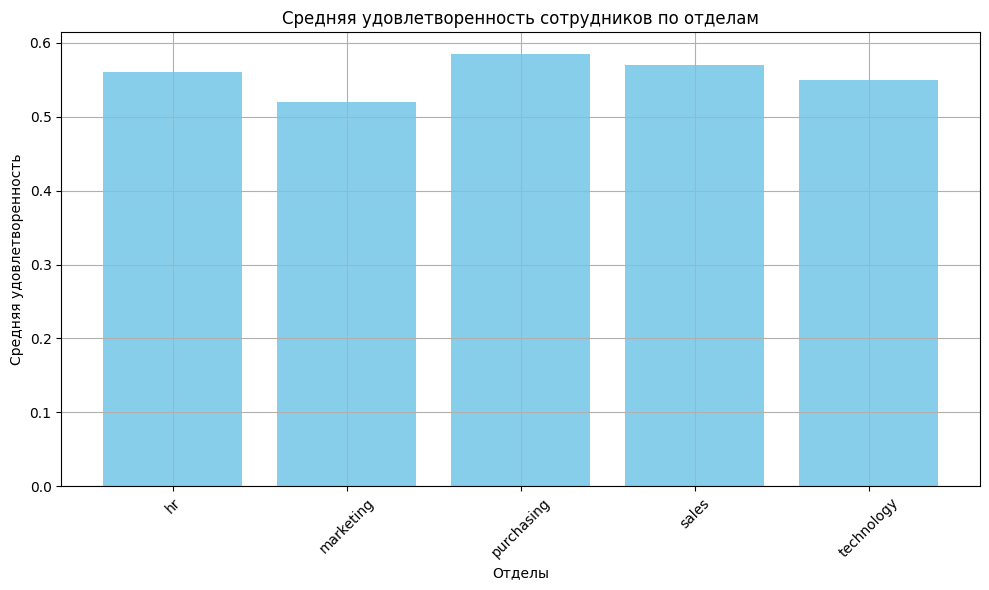

In [32]:
satisfaction_by_dept = train_data_one.groupby('dept')['job_satisfaction_rate'].median().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(satisfaction_by_dept['dept'], satisfaction_by_dept['job_satisfaction_rate'], color='skyblue')
plt.xlabel('Отделы')
plt.ylabel('Средняя удовлетворенность')
plt.title('Средняя удовлетворенность сотрудников по отделам')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)

plt.show()

<div style="border: 2px solid #DABDAB; border-radius: 5px; padding: 10px; color: #45322E; background-color#FFF0FC;">
<p>

1. dept: В столбце есть пропуски, которые затем нужно заменить категорией. Больше трети сотрудников работают в отделе продаж, что свидетельствует о значительном количестве сотрудников, занимающихся клиентским обслуживанием и продажами. Одновременно меньше всего сотрудников занимаются административными задачами в отделе HR.

2. level: Больше всего сотрудников уровня "junior", что может указывать на активную политику привлечения молодых специалистов или на программы стажировок. Сотрудников уровня "middle" на 150 меньше, а сеньоров всего 358. Это подтверждает теорию о том, что в компании преобладают молодые сотрудники, но также может свидетельствовать о сложностях в  системы карьерного роста для сотрудников среднего уровня.

3. workload: Больше всего сотрудников средней загруженности, что может означать, что большинство сотрудников выполняют свои обязанности с нормальной нагрузкой. Однако меньше всего сотрудников с высокой загрузкой, что может свидетельствовать о необходимости более эффективного распределения задач или дополнительной поддержки для сотрудников с высокой нагрузкой. Этот признак, возможно, оказывает значительное влияние на уровень удовлетворенности сотрудников работой в компании.

4. last_year_promo: За последний год повысили только 120 сотрудников из 4000, что может указывать на консервативную политику компании по повышению, либо на низкую доступность возможностей для карьерного роста (упомянуто вышее). Это также может вызывать неудовлетворенность среди сотрудников и приводить к их уходу из компании.

5. last_year_violations: Более 500 сотрудников в компании нарушили трудовой договор за последний год. Это может быть признаком непонимания правил и политик компании, а также возможным индикатором низкой мотивации среди части персонала. Возможно, это одна из причин низкой оценки работы некоторых сотрудников руководителями.</p>
</div>

### Корреляционный анализ

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has be

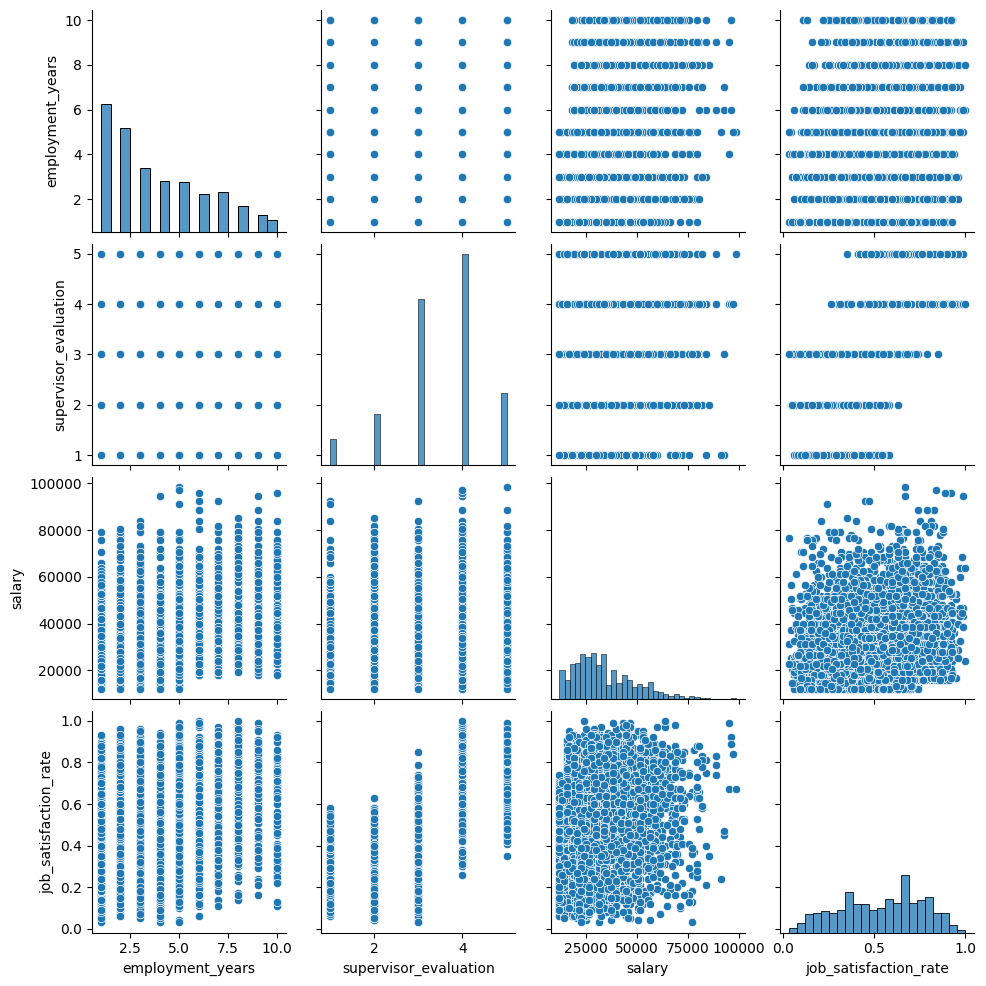

In [33]:
numerical_features = train_data_one.select_dtypes(include=['int64', 'float64']).drop(columns=['id'])
sns.pairplot(numerical_features, palette='Set1')
plt.show()

<div style="border: 2px solid #DABDAB; border-radius: 5px; padding: 10px; color: #45322E; background-color#FFF0FC;">
<p> Линейной зависимости между признаками обнаружено не было.  </p>
</div>

In [34]:
train_data_one.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB


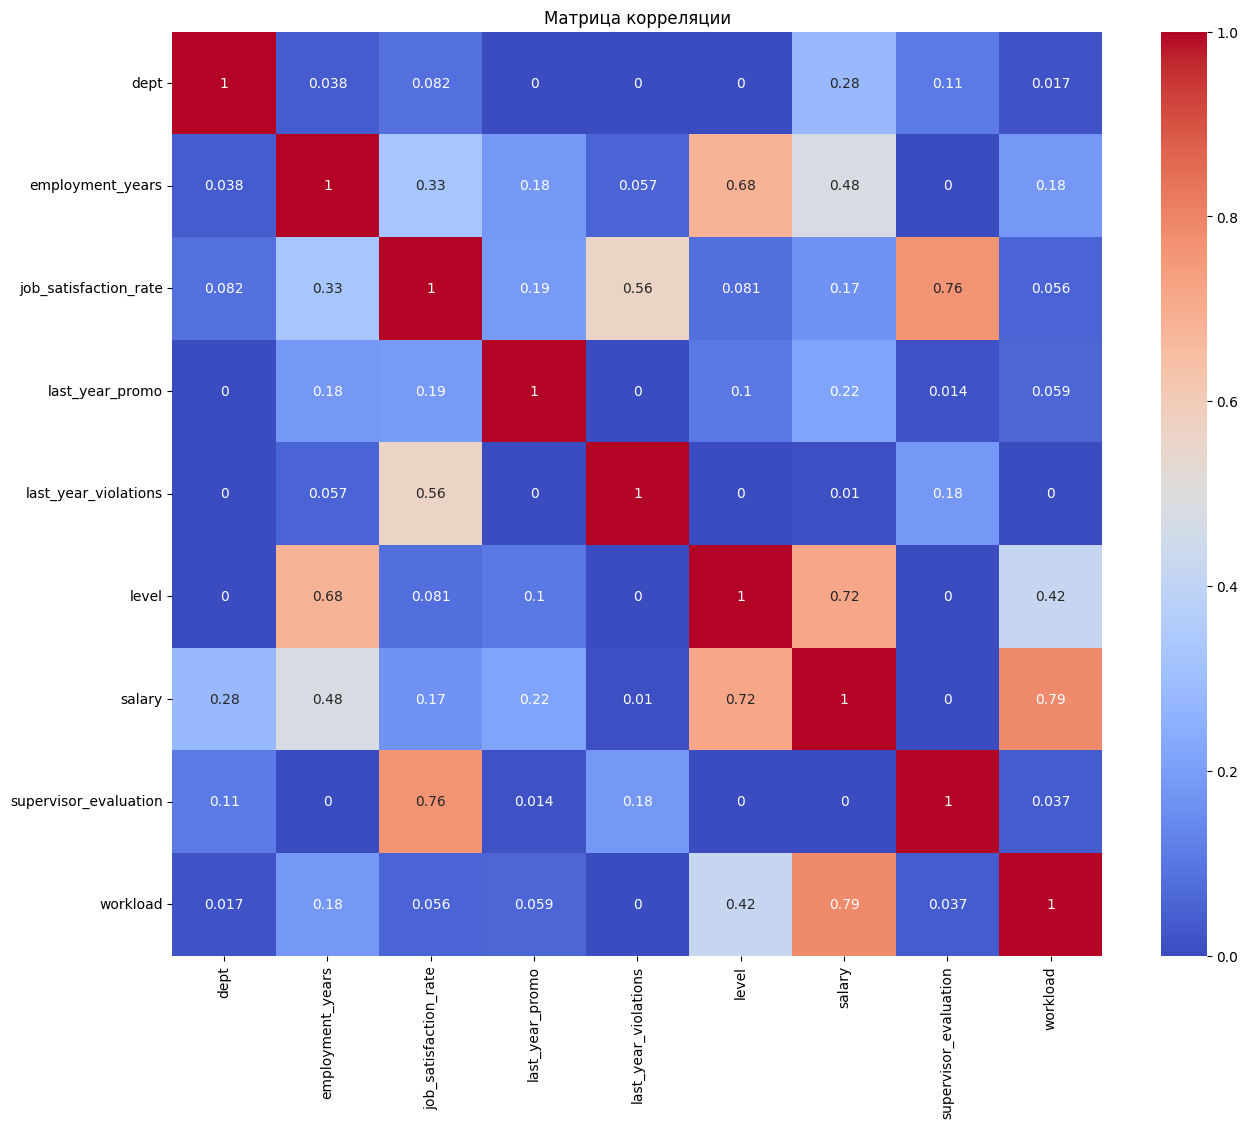

In [35]:
columns_list = train_data_one.columns.difference(['id'])

correlation_matrix = train_data_one[columns_list].phik_matrix(
    interval_cols=['employment_years','salary','job_satisfaction_rate'])


plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Матрица корреляции')
plt.show()

<div style="border: 2px solid #DABDAB; border-radius: 5px; padding: 10px; color: #45322E; background-color#FFF0FC;">
<p> Наблюдается корреляция между целевым признаком и last_year_violations, а так же с supervisor_evaluation, с остальными признаками корреляция целевого намного ниже. </p>
</div>

In [36]:
train_data_one
test_features_one
test_target_one

,id,job_satisfaction_rate
0,130604,0.74
1,825977,0.75
2,418490,0.60
3,555320,0.72
4,826430,0.08
...,...,...
1995,405257,0.28
1996,370925,0.21
1997,857722,0.39
1998,303402,0.26


In [37]:
def remove_and_sort_by_id(df):
    if 'id' in df.columns:
        df.sort_values(by='id', inplace=True)
        df.drop('id', axis=1, inplace=True)
        return df
    else:
        print("Столбец 'id' не найден в датафрейме.")
        return None

train = remove_and_sort_by_id(train_data_one.copy())
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 560 to 3757
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dept                   3994 non-null   object 
 1   level                  3996 non-null   object 
 2   workload               4000 non-null   object 
 3   employment_years       4000 non-null   int64  
 4   last_year_promo        4000 non-null   object 
 5   last_year_violations   4000 non-null   object 
 6   supervisor_evaluation  4000 non-null   int64  
 7   salary                 4000 non-null   int64  
 8   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 312.5+ KB


In [38]:
train.head()

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
560,purchasing,junior,low,1,no,no,4,15600,0.60
1124,sales,junior,low,1,no,yes,4,19200,0.45
1509,sales,junior,medium,2,no,no,2,20400,0.36
2106,sales,middle,low,2,no,no,4,28800,0.66
405,technology,junior,medium,1,no,no,4,34800,0.71


Анализ категориального столбца 'dept':
Уникальные значения:
['sales' 'hr' 'technology' 'purchasing' 'marketing' nan]
Количество уникальных значений: 6
Распределение значений:
dept
sales         1512
technology     866
purchasing     610
marketing      550
hr             456
Name: count, dtype: int64


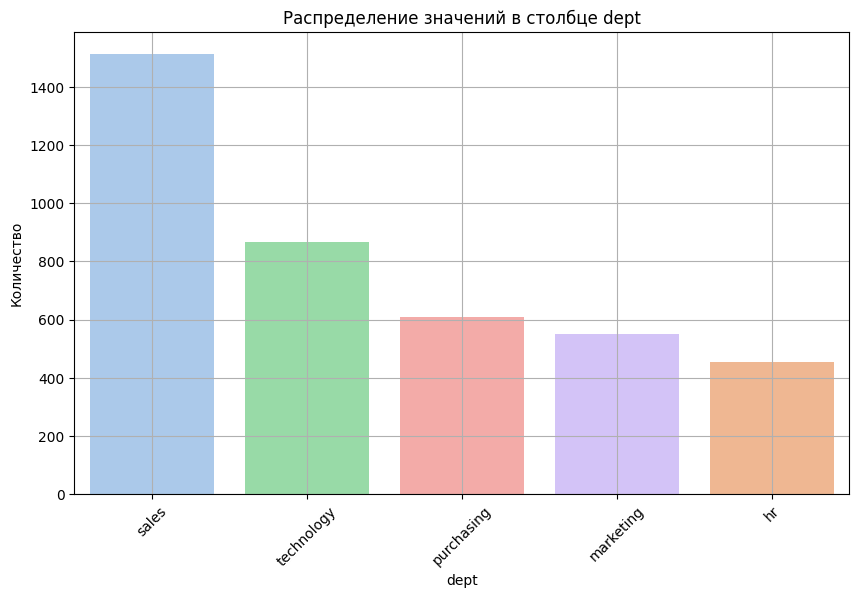



Анализ категориального столбца 'level':
Уникальные значения:
['junior' 'middle' 'senior' nan]
Количество уникальных значений: 4
Распределение значений:
level
junior    1894
middle    1744
senior     358
Name: count, dtype: int64


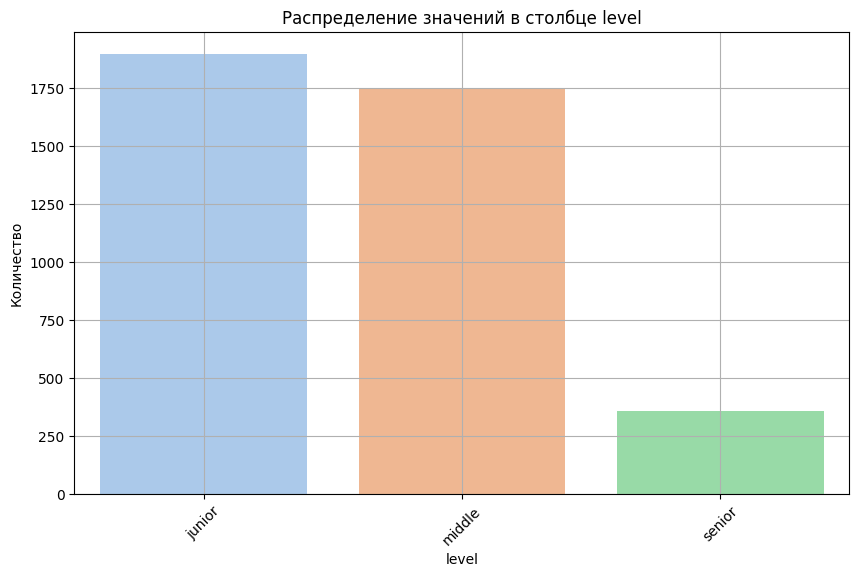



Анализ категориального столбца 'workload':
Уникальные значения:
['medium' 'high' 'low']
Количество уникальных значений: 3
Распределение значений:
workload
medium    2066
low       1200
high       734
Name: count, dtype: int64


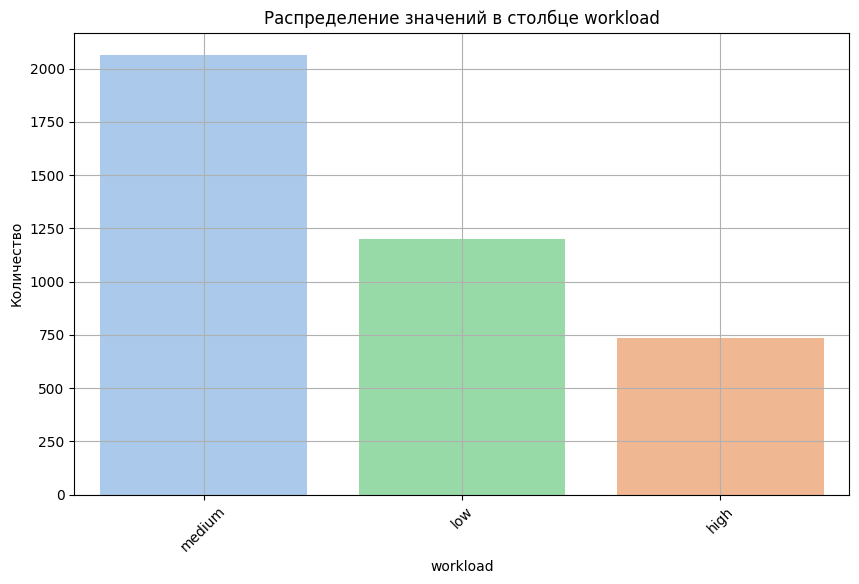



Анализ категориального столбца 'last_year_promo':
Уникальные значения:
['no' 'yes']
Количество уникальных значений: 2
Распределение значений:
last_year_promo
no     3880
yes     120
Name: count, dtype: int64


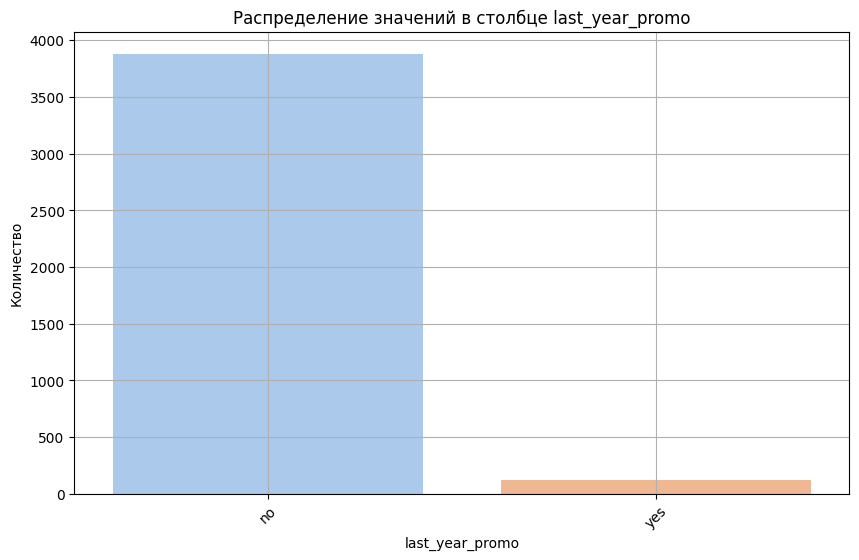



Анализ категориального столбца 'last_year_violations':
Уникальные значения:
['no' 'yes']
Количество уникальных значений: 2
Распределение значений:
last_year_violations
no     3441
yes     559
Name: count, dtype: int64


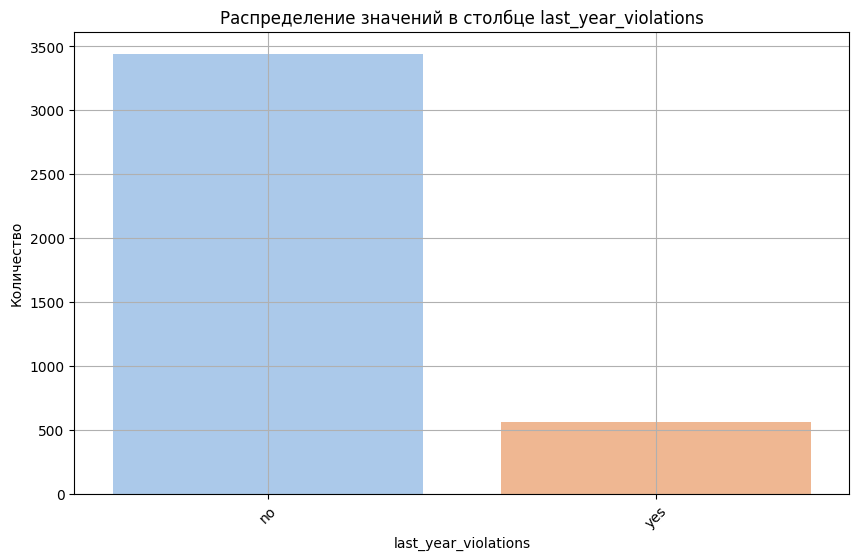

In [39]:
explore_cat_columns(train_data_one)

### Подготовка данных

In [40]:
ohe_columns = ['dept', 'last_year_promo', 'last_year_violations']
ord_columns = ['level','workload']
num_columns = ['employment_years', 'supervisor_evaluation', 'salary']

In [41]:
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore'))
    ]
)


ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    ['junior', 'middle', 'senior'],
                    ['low', 'medium', 'high'],
                ],
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', MinMaxScaler(), num_columns)
    ],
    remainder='passthrough'
)

linear_pipeline = Pipeline([
    ('preprocessor', data_preprocessor),
    ('model', LinearRegression())
])

tree_pipeline = Pipeline([
    ('preprocessor', data_preprocessor),
    ('model', DecisionTreeRegressor())
])

param_grid_linear = {
    'model__fit_intercept': [True, False],
    'model__copy_X': [True, False],
    'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
}


param_grid_tree = {
    'model__max_depth':  range(2, 11),
    'model__min_samples_split':  range(2, 11),
    'model__min_samples_leaf':  range(2, 11),
    'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
}

In [42]:
X_train = train.drop(['job_satisfaction_rate'], axis=1)
y_train = train['job_satisfaction_rate']
X_train.shape, y_train.shape

((4000, 8), (4000,))

In [43]:
def smape(y_true, y_pred):
    error = np.abs(y_true - y_pred)
    scale = (np.abs(y_true) + np.abs(y_pred)) / 2
    return np.mean(error / scale) * 100

scorer = make_scorer(smape, greater_is_better=False)

### Обучение модели

In [44]:
randomized_search_linear = RandomizedSearchCV(
    linear_pipeline,
    param_grid_linear,
    cv=5,
    scoring=scorer,
    random_state=RANDOM_STATE,
    n_jobs=-1,
    error_score='raise'
)


randomized_search_linear.fit(X_train, y_train)


print('Лучшая модель и её параметры:\n\n', randomized_search_linear.best_estimator_)
print('Метрика лучшей модели на тренировочной выборке:', randomized_search_linear.best_score_)

randomized_search_tree = RandomizedSearchCV(
    tree_pipeline,
    param_grid_tree,
    cv=5,
    scoring=scorer,
    random_state=RANDOM_STATE,
    n_jobs=-1,
    error_score='raise'
)


randomized_search_tree.fit(X_train, y_train)


print('Лучшая модель и её параметры:\n\n', randomized_search_tree.best_estimator_)
print('Метрика лучшей модели на тренировочной выборке:', randomized_search_tree.best_score_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                   

### Предсказание на тестовой выборке

In [45]:
test_features = remove_and_sort_by_id(test_features_one.copy())
test_target = remove_and_sort_by_id(test_target_one.copy())
test_features.info()
test_target.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 1172 to 1844
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dept                   1998 non-null   object
 1   level                  1999 non-null   object
 2   workload               2000 non-null   object
 3   employment_years       2000 non-null   int64 
 4   last_year_promo        2000 non-null   object
 5   last_year_violations   2000 non-null   object
 6   supervisor_evaluation  2000 non-null   int64 
 7   salary                 2000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 140.6+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 1734 to 334
Data columns (total 1 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1)
memory usage: 31.2 KB


In [46]:
X_train_preprocessed = data_preprocessor.fit_transform(X_train)
X_test_preprocessed = data_preprocessor.transform(test_features)

model_linear = LinearRegression(fit_intercept=False)
model_linear.fit(X_train_preprocessed, y_train)

y_pred = model_linear.predict(X_test_preprocessed)
smape_score = smape(test_target['job_satisfaction_rate'], y_pred)
print("SMAPE", smape_score)

SMAPE 25.785110215827117


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [47]:
model_tree = DecisionTreeRegressor(max_depth=10, min_samples_leaf=10,
                                       min_samples_split=5)
model_tree.fit(X_train_preprocessed, y_train)
y_pred_tree = model_tree.predict(X_test_preprocessed)
smape_score = smape(test_target['job_satisfaction_rate'], y_pred_tree)
print("SMAPE", smape_score)

SMAPE 14.883010796366447


<div style="border: 2px solid #DABDAB; border-radius: 5px; padding: 10px; color: #45322E; background-color#FFF0FC;">
<p> Лучшая модель DecisionTreeRegressor с гиперпараметрами (max_depth=10, min_samples_leaf=10,min_samples_split=5) метрика SMAPE показывает 14.8, что говорит о хорошем результате, но стоит попробовать улучшить результат, возможно стоит пресмотреть важнность признаков и определить какие стоит трансформировать. </p>
</div>

### Анализ важности признаков

In [48]:
data_preprocessor.fit(X_train)
feature_names = data_preprocessor.get_feature_names_out()
X_train_df = pd.DataFrame(X_train_preprocessed, columns=feature_names)
X_train_df.head()

index_names_df = pd.DataFrame({'Feature Name': X_train_df.columns})
index_names_df

,Feature Name
0,ohe__dept_marketing
1,ohe__dept_purchasing
2,ohe__dept_sales
3,ohe__dept_technology
4,ohe__last_year_promo_yes
5,ohe__last_year_violations_yes
6,ord__level
7,ord__workload
8,num__employment_years
9,num__supervisor_evaluation


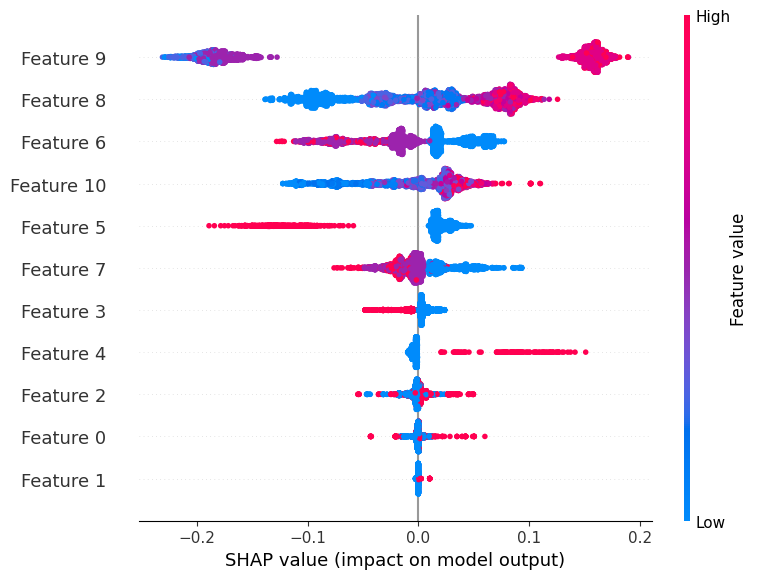

In [49]:
explainer = shap.TreeExplainer(model_tree)
shap_values = explainer.shap_values(X_train_preprocessed)
shap.summary_plot(shap_values, X_train_preprocessed, max_display=20)

<div style="border: 2px solid #DABDAB; border-radius: 5px; padding: 10px; color: #45322E; background-color#FFF0FC;">
<p> Признак оказывающий наибольшее влияние на модель, это оценка качества работы сотрудника, которую дал руководитель, а так же  признаки employment_years и last_year_violations_yes. От признаков с 0 по 4 следует избавится.  </p>
</div>

In [50]:
ohe_columns = ['last_year_promo', 'last_year_violations']
ord_columns = ['level', 'workload']
num_columns = ['employment_years', 'supervisor_evaluation', 'salary']
ohe_pipe_new = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore'))
    ]
)


ord_pipe_new = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    ['junior', 'middle', 'senior'],
                    ['low', 'medium', 'high']
                ],
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

data_preprocessor_new = ColumnTransformer(
    [('ohe', ohe_pipe_new, ohe_columns),
     ('ord', ord_pipe_new, ord_columns),
     ('num', MinMaxScaler(), num_columns)
    ],
    remainder='passthrough'
)

In [51]:
X_test_updated = test_features.drop(columns=['dept'])
X_train_updated = X_train.drop(columns=['dept'])

X_train_preprocessed = data_preprocessor_new.fit_transform(X_train_updated)
X_test_preprocessed = data_preprocessor_new.transform(X_test_updated)
model_tree1 = DecisionTreeRegressor(max_depth=10, min_samples_leaf=10,min_samples_split=5)
model_tree1.fit(X_train_preprocessed, y_train)
y_pred_tree1 = model_tree1.predict(X_test_preprocessed)
smape_score = smape(test_target['job_satisfaction_rate'],y_pred_tree1)
print("SMAPE", smape_score)

SMAPE 15.6905455483183


In [52]:
model_linear1 = LinearRegression(fit_intercept=False)
model_linear1.fit(X_train_preprocessed, y_train)

y_pred_linear1 = model_linear1.predict(X_test_preprocessed)
smape_score = smape(test_target['job_satisfaction_rate'], y_pred_linear1)
print("SMAPE", smape_score)

SMAPE 27.74969363935143


<div style="border: 2px solid #DABDAB; border-radius: 5px; padding: 10px; color: #45322E; background-color#FFF0FC;">
    <p> Данные преобразования не изменили качество моделей, даже сделали их хуже.</p>
</div>

### Оформление выводов

<div style="border: 2px solid #DABDAB; border-radius: 5px; padding: 10px; color: #45322E; background-color#FFF0FC;">
    <p>
Данные были загружены и проанализированы.</p>  <p>  В данных имеются пропуски, которые были обработаны в пайплайне.</p>
<p>В результате анализа серьезных аномалий, которые могли бы повлиять на модель, не выявлено.</p>
<p>Был проведен корреляционный анализ, в результате которого не было найдено очевидных линейных зависимостей. Однако были обнаружены нелинейные зависимости для целевого признака. Несмотря на то, что для некоторых столбцов зависимости не были обнаружены, они оказали важное влияние на модель.
    
<p>Лучше всего показала себя модель DecisionTreeRegressor с параметрами max_depth=10, min_samples_leaf=10, min_samples_split=5 достигнув хорошего результата по метрике SMAPE (14.8).</p>
</div>

## Задача 2: предсказание увольнения сотрудника из компании

### Загрузка данных

In [53]:
train_quit = pd.read_csv("/content/train_quit.csv")
test_target_quit= pd.read_csv("/content/test_target_quit.csv")
train_quit.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
4,910140,marketing,junior,medium,2,no,no,5,25200,no


In [54]:
test_target_quit.head()

,id,quit
0,999029,yes
1,372846,no
2,726767,no
3,490105,no
4,416898,yes


In [55]:
test_target_quit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2000 non-null   int64 
 1   quit    2000 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [56]:
train_quit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB


### Предобработка данных

#### Поиск и обработка дубликатов

In [57]:
duplicates_df(train_quit,'train_quit')

Явных дубликатов для train_quit не обнаружено.


In [58]:
hidden_duplicates_df(train_quit,'train_quit', ['id','dept'])

нет неявных дубликатов в датафрейме train_quit


In [59]:
results = analyze_column(train_quit)
for col, (unique_values, num_unique_values, value_counts) in results.items():
    print(f"\n Анализ столбца '{col}':")
    print("\n Уникальные значения:", unique_values)
    print("Количество уникальных значений:", num_unique_values)
    print("Частота уникальных значений:")
    print(value_counts)


 Анализ столбца 'dept':

 Уникальные значения: ['sales' 'purchasing' 'marketing' 'technology' 'hr']
Количество уникальных значений: 5
Частота уникальных значений:
dept
sales         1438
technology     928
purchasing     588
marketing      582
hr             464
Name: count, dtype: int64

 Анализ столбца 'level':

 Уникальные значения: ['middle' 'junior' 'sinior']
Количество уникальных значений: 3
Частота уникальных значений:
level
junior    1949
middle    1694
sinior     357
Name: count, dtype: int64

 Анализ столбца 'workload':

 Уникальные значения: ['high' 'medium' 'low']
Количество уникальных значений: 3
Частота уникальных значений:
workload
medium    2118
low       1208
high       674
Name: count, dtype: int64

 Анализ столбца 'last_year_promo':

 Уникальные значения: ['no' 'yes']
Количество уникальных значений: 2
Частота уникальных значений:
last_year_promo
no     3887
yes     113
Name: count, dtype: int64

 Анализ столбца 'last_year_violations':

 Уникальные значения: ['no' 'y

In [60]:
train_quit['level'].replace({"sinior" : "senior"}, inplace=True)
print(train_quit['level'].unique())

['middle' 'junior' 'senior']


<ipython-input-60-a5937b2a8fa9>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_quit['level'].replace({"sinior" : "senior"}, inplace=True)


<div style="border: 2px solid #DABDAB; border-radius: 5px; padding: 10px; color: #45322E; background-color#FFF0FC;">
<p> Вывод: На данном этапе, не обнаружено проблем и исправлена текстовая ошибка в столбце.  </p>
</div>

In [61]:

id_equal = train_data_one['id'].equals(train_quit['id'])
id_equal

False

<div style="border: 2px solid #DABDAB; border-radius: 5px; padding: 10px; color: #45322E; background-color#FFF0FC;">
<p> Сотрудники в этом датафрейме отличаются. Посмотрим на сколько.  </p>
</div>

In [62]:
missing_in_train_quit = train_data_one[~train_data_one['id'].isin(train_quit['id'])]
missing_in_train_data_one = train_quit[~train_quit['id'].isin(train_data_one['id'])]


print("Значения, которые есть в train_data_one, но отсутствуют в train_quit:")
print(missing_in_train_quit.count())

print("\nЗначения, которые есть в train_quit, но отсутствуют в train_data_one:")
print(missing_in_train_data_one.count())

Значения, которые есть в train_data_one, но отсутствуют в train_quit:
id                       4000
dept                     3994
level                    3996
workload                 4000
employment_years         4000
last_year_promo          4000
last_year_violations     4000
supervisor_evaluation    4000
salary                   4000
job_satisfaction_rate    4000
dtype: int64

Значения, которые есть в train_quit, но отсутствуют в train_data_one:
id                       4000
dept                     4000
level                    4000
workload                 4000
employment_years         4000
last_year_promo          4000
last_year_violations     4000
supervisor_evaluation    4000
salary                   4000
quit                     4000
dtype: int64


<div style="border: 2px solid #DABDAB; border-radius: 5px; padding: 10px; color: #45322E; background-color#FFF0FC;">
<p> Датафреймы полностью различаются.  </p>
</div>

### Исследовательский анализ данных

#### Исследовательский анализ числовых данных для таблицы ***train_quit***

In [63]:
train_quit.describe()

,id,employment_years,supervisor_evaluation,salary
count,4000.000000,4000.000000,4000.000000,4000.000000
mean,552099.283750,3.701500,3.474750,33805.800000
std,260158.031387,2.541852,1.004049,15152.415163
min,100222.000000,1.000000,1.000000,12000.000000
25%,327785.750000,2.000000,3.000000,22800.000000
50%,546673.000000,3.000000,4.000000,30000.000000
75%,781497.750000,6.000000,4.000000,43200.000000
max,999915.000000,10.000000,5.000000,96000.000000


<div style="border: 2px solid #DABDAB; border-radius: 5px; padding: 10px; color: #45322E; background-color#FFF0FC;">
<p> Значения в двух датафреймах похожи </p>
</div>


#####  Анализ длительности работы в компании (в годах)

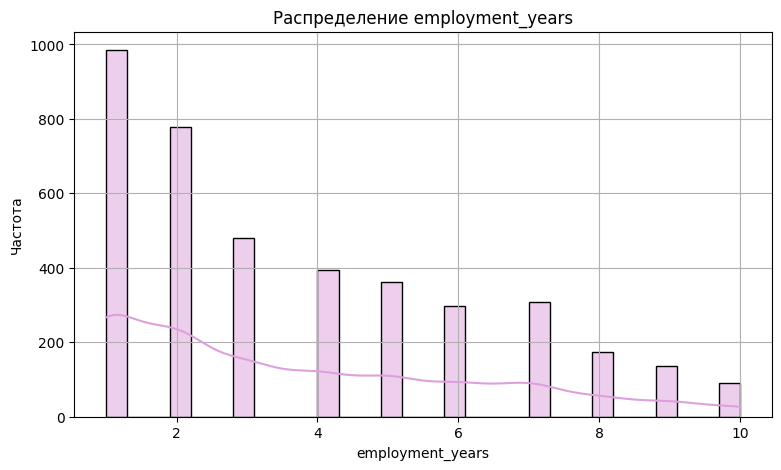

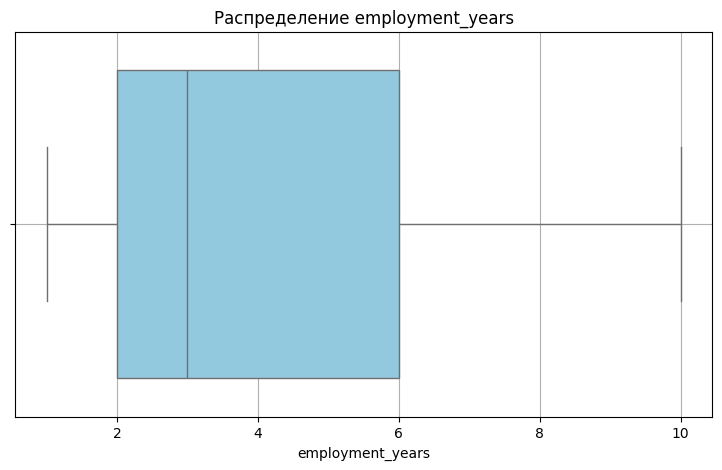

In [64]:
plot_distribution(train_quit, 'employment_years', color='#DDA0DD')

#####  Анализ  оценки качества работы сотрудника, которую дал руководитель.  

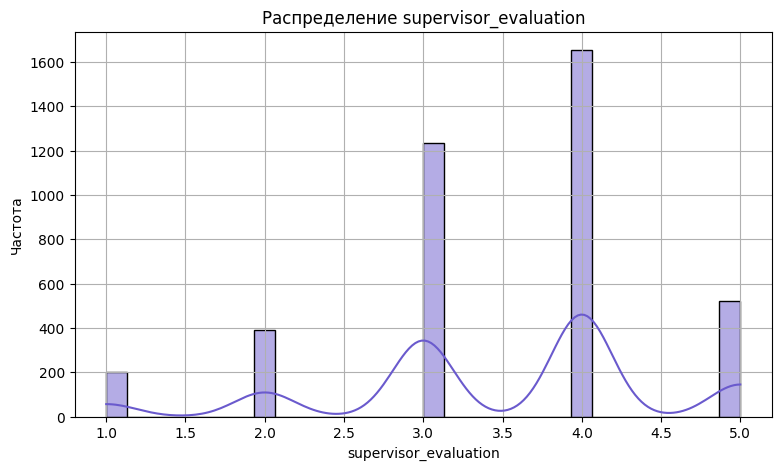

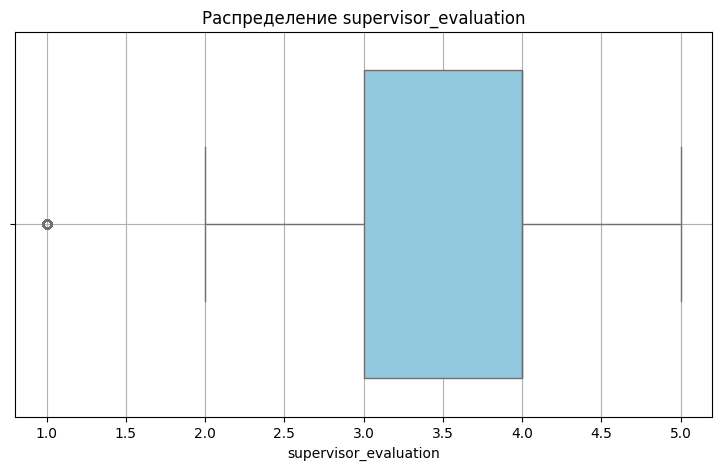

In [65]:
plot_distribution(train_quit, 'supervisor_evaluation', color='#6A5ACD')

#####  Анализ  зарплаты.

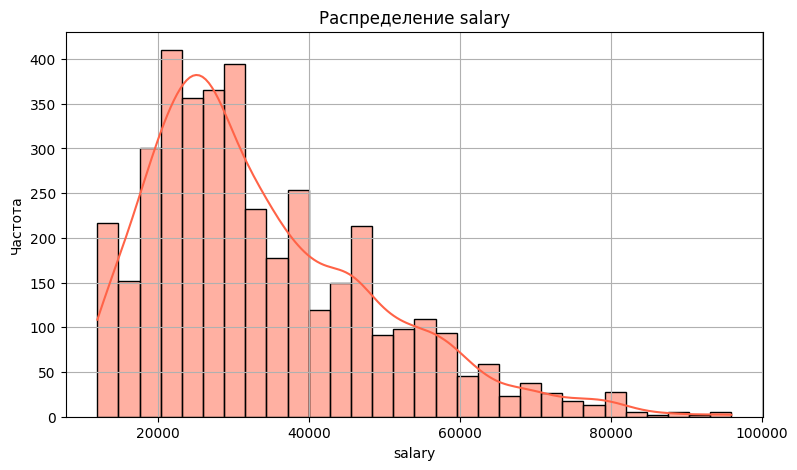

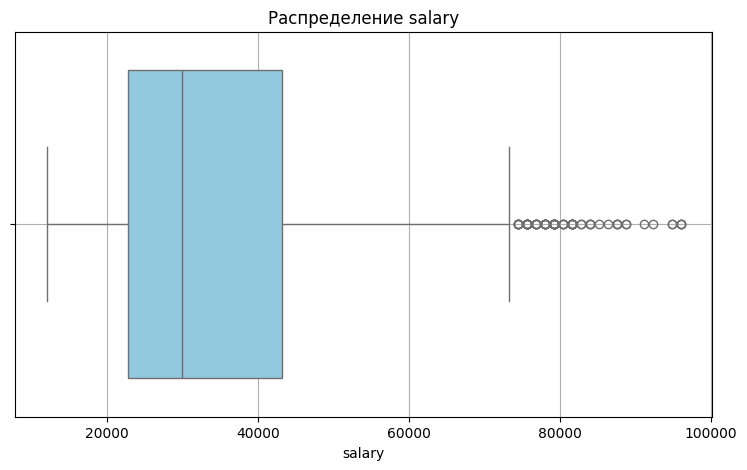

In [66]:
 plot_distribution(train_quit, 'salary', color='#FF6347')

<div style="border: 2px solid #DABDAB; border-radius: 5px; padding: 10px; color: #45322E; background-color#FFF0FC;">
<p>
    Вывод: Все числовые столбцы в датафрейме train_quit имеют схожие распределения, тенденции и значение как и столбцы в  train_data_one </p>
</div>

##### Анализ категориальных данных

Анализ категориального столбца 'dept':
Уникальные значения:
['sales' 'purchasing' 'marketing' 'technology' 'hr']
Количество уникальных значений: 5
Распределение значений:
dept
sales         1438
technology     928
purchasing     588
marketing      582
hr             464
Name: count, dtype: int64


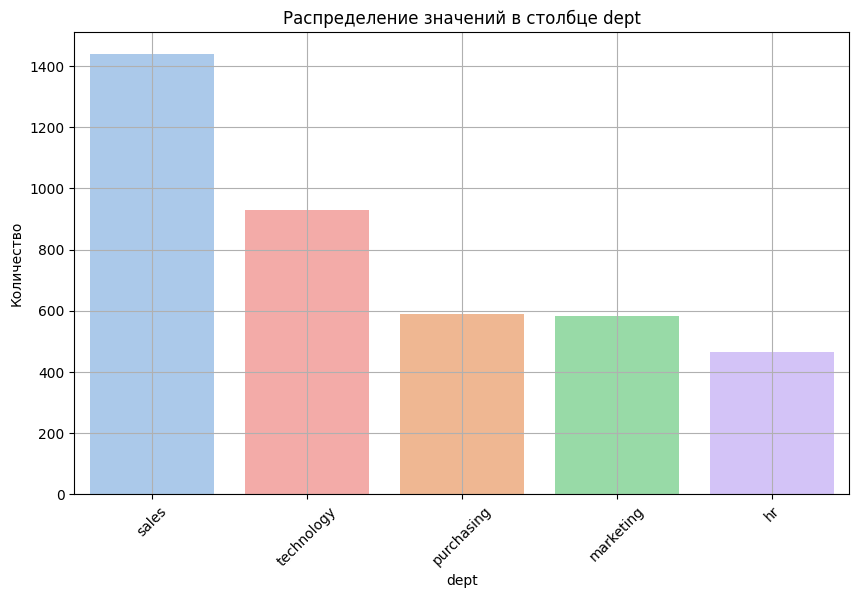



Анализ категориального столбца 'level':
Уникальные значения:
['middle' 'junior' 'senior']
Количество уникальных значений: 3
Распределение значений:
level
junior    1949
middle    1694
senior     357
Name: count, dtype: int64


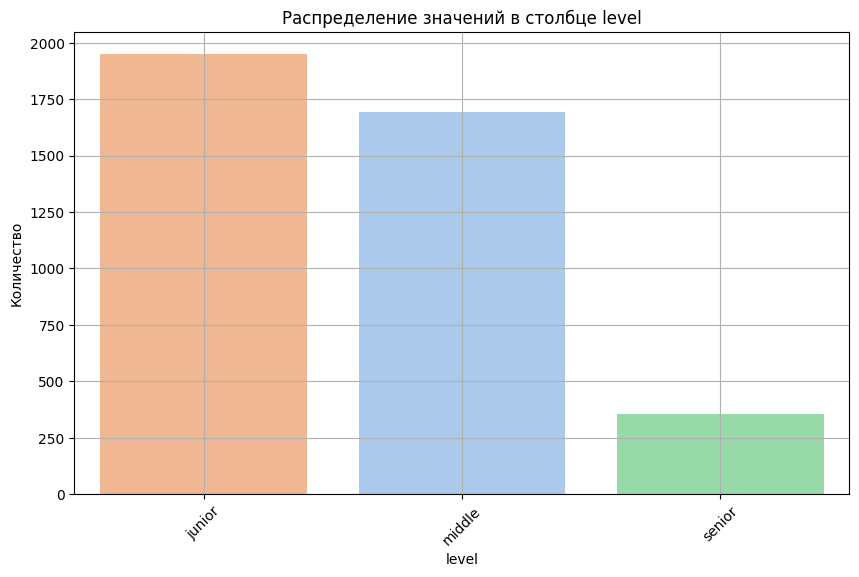



Анализ категориального столбца 'workload':
Уникальные значения:
['high' 'medium' 'low']
Количество уникальных значений: 3
Распределение значений:
workload
medium    2118
low       1208
high       674
Name: count, dtype: int64


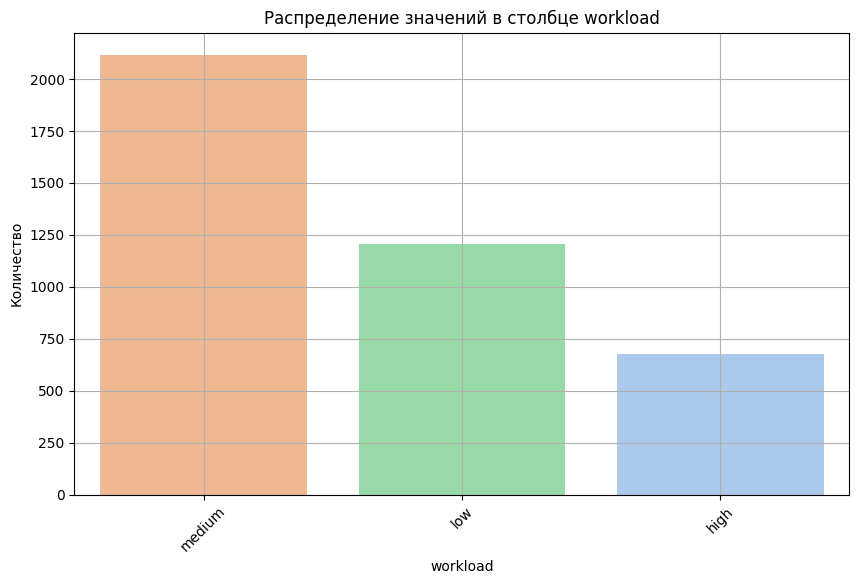



Анализ категориального столбца 'last_year_promo':
Уникальные значения:
['no' 'yes']
Количество уникальных значений: 2
Распределение значений:
last_year_promo
no     3887
yes     113
Name: count, dtype: int64


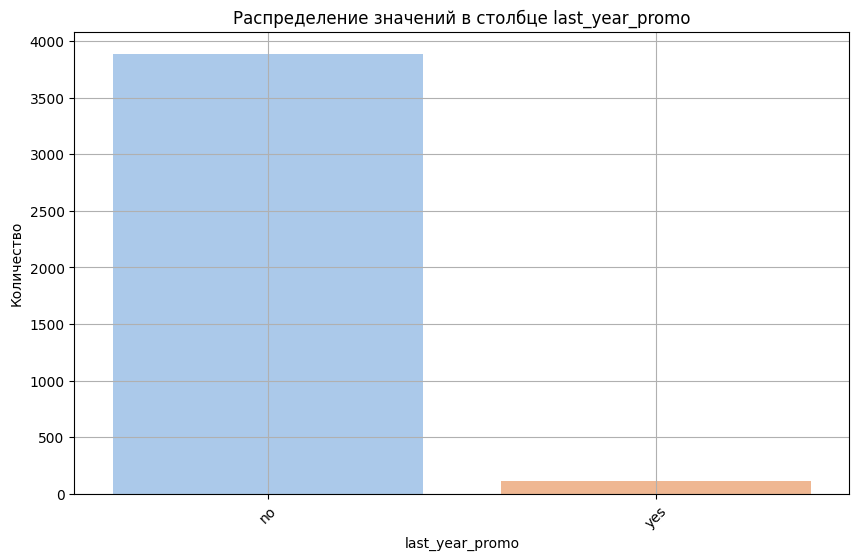



Анализ категориального столбца 'last_year_violations':
Уникальные значения:
['no' 'yes']
Количество уникальных значений: 2
Распределение значений:
last_year_violations
no     3455
yes     545
Name: count, dtype: int64


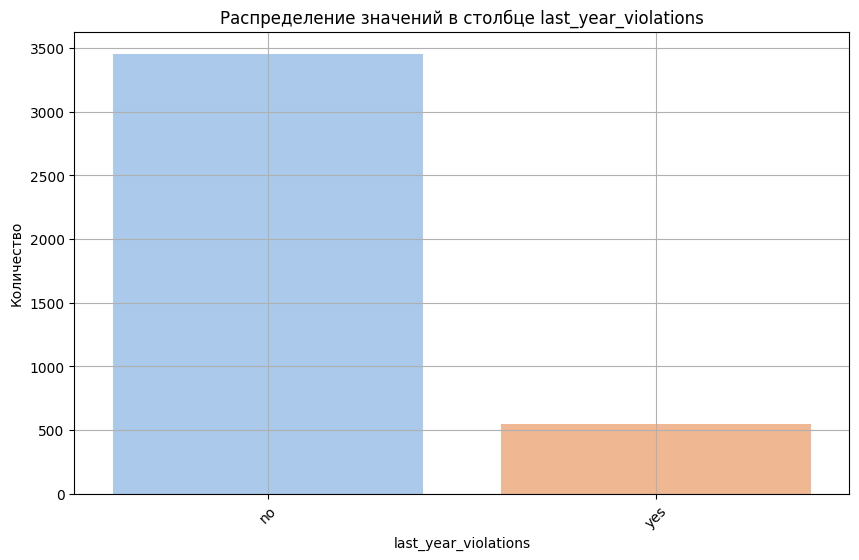



Анализ категориального столбца 'quit':
Уникальные значения:
['no' 'yes']
Количество уникальных значений: 2
Распределение значений:
quit
no     2872
yes    1128
Name: count, dtype: int64


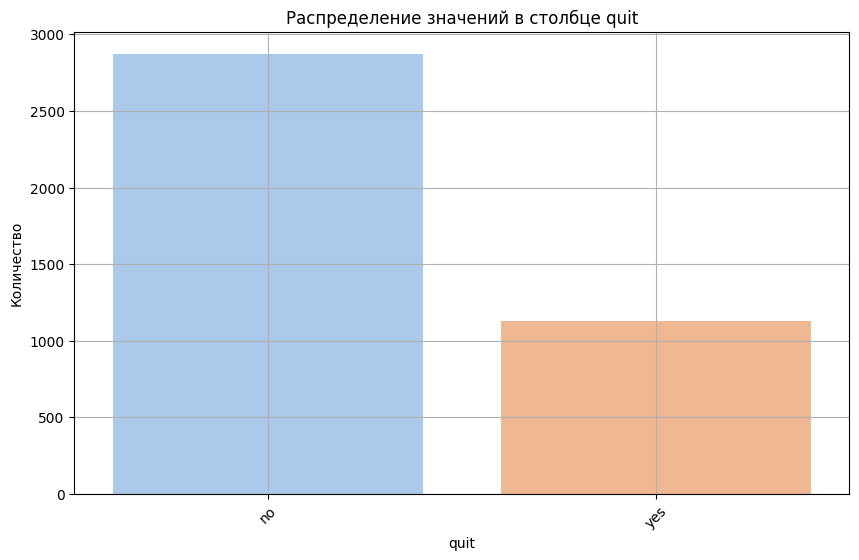

In [67]:
explore_cat_columns(train_quit)

In [68]:
department = train_quit.groupby('dept').size()
resigned = train_quit[train_quit['quit'] == 'yes'].groupby('dept').size()
resignation_ratio = resigned / department
resignation_ratio

,0
dept,
hr,0.250000
marketing,0.280069
purchasing,0.282313
sales,0.283032
technology,0.297414


<div style="border: 2px solid #DABDAB; border-radius: 5px; padding: 10px; color: #45322E; background-color#FFF0FC;">
<p>
    Вывод: Все категориальные столбцы, за исключением целевого признака, в датафрейме train_quit имеют схожие распределения, тенденции и значение как и столбцы в  train_data_one.
    
    
    Наиболее высокая доля уволившихся сотрудников от всех сотрудников, в отделе технологий(0.29).
<p>
    Распределение групп целевого признака (yes,no)  представлены не равномерно, значений yes в два раза меньше.
    </p>
</div>

### Добавление нового входного признака

In [69]:
y_pred = randomized_search_tree.predict(train_quit)
train_quit['job_satisfaction_rate'] = y_pred
train_quit.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,job_satisfaction_rate
0,723290,sales,middle,high,2,no,no,4,54000,no,0.601169
1,814010,sales,junior,medium,2,no,no,4,27600,no,0.828889
2,155091,purchasing,middle,medium,5,no,no,1,37200,no,0.402143
3,257132,sales,junior,medium,2,no,yes,3,24000,yes,0.356875
4,910140,marketing,junior,medium,2,no,no,5,25200,no,0.794667


In [70]:
y_pred = randomized_search_tree.predict(test_features)
test_features['job_satisfaction_rate'] = y_pred_tree
test_features.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
1172,hr,junior,low,2,no,no,4,19200,0.829787
852,marketing,junior,low,4,no,no,4,16800,0.829787
848,purchasing,middle,high,5,no,no,4,55200,0.765798
524,sales,middle,medium,5,no,no,4,43200,0.807181
476,sales,middle,high,6,no,no,4,48000,0.765798


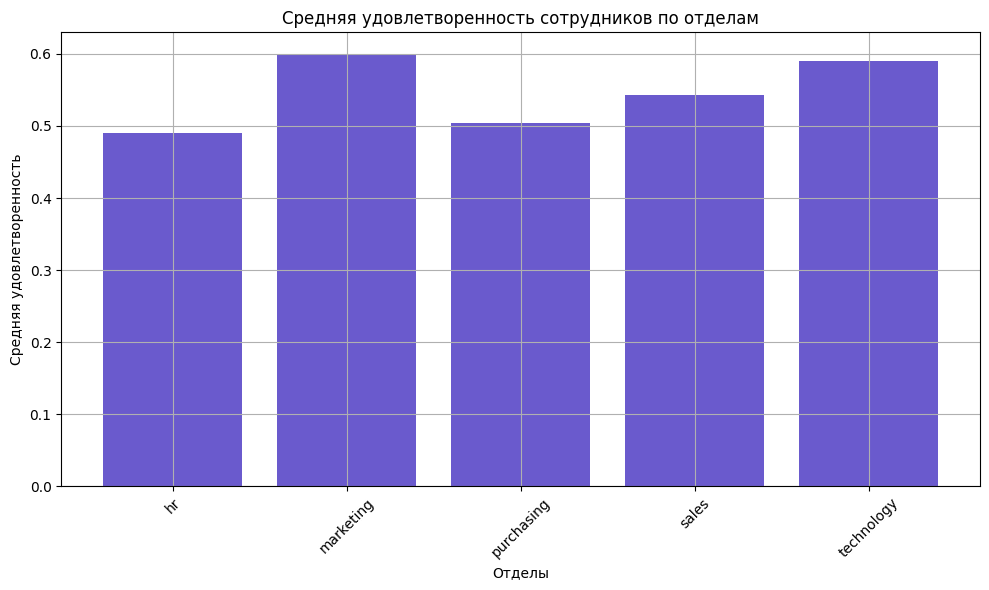

In [71]:
satisfaction_by_dept = train_quit.groupby('dept')['job_satisfaction_rate'].median().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(satisfaction_by_dept['dept'], satisfaction_by_dept['job_satisfaction_rate'], color='#6A5ACD')
plt.xlabel('Отделы')
plt.ylabel('Средняя удовлетворенность')
plt.title('Средняя удовлетворенность сотрудников по отделам')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

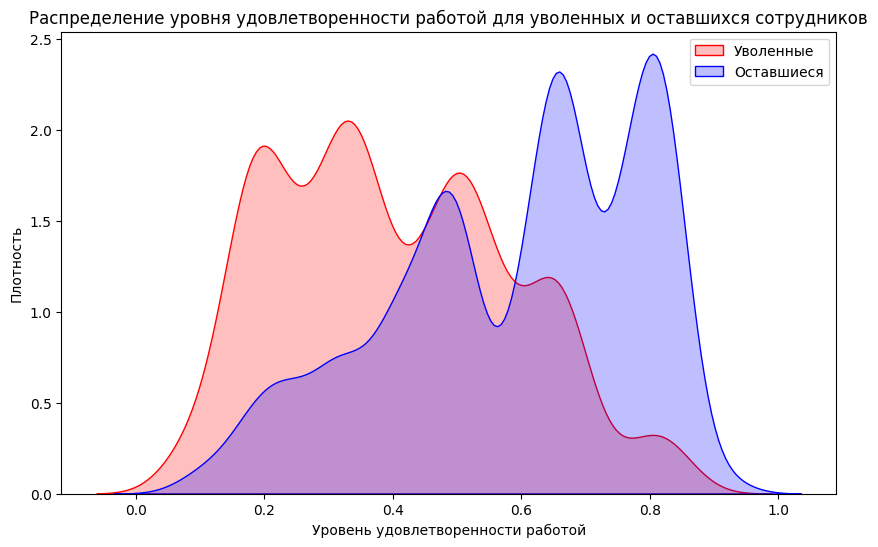

In [72]:
quit_employees = train_quit[train_quit['quit'] == 'yes']['job_satisfaction_rate']
stayed_employees = train_quit[train_quit['quit'] == 'no']['job_satisfaction_rate']

plt.figure(figsize=(10, 6))
sns.kdeplot(quit_employees, color='red', label='Уволенные', fill=True)
sns.kdeplot(stayed_employees, color='blue', label='Оставшиеся', fill=True)
plt.title('Распределение уровня удовлетворенности работой для уволенных и оставшихся сотрудников')
plt.xlabel('Уровень удовлетворенности работой')
plt.ylabel('Плотность')
plt.legend()
plt.show()

<div style="border: 2px solid #DABDAB; border-radius: 5px; padding: 10px; color: #45322E; background-color#FFF0FC;">
<p> На графике видно, как уровень удовлетворенности сотрудников влияет на решение об уходе из компании. Чем ниже уровень удовлетворенности, тем больше сотрудников уволилось.
    </p>
</div>

### Корреляционный анализ

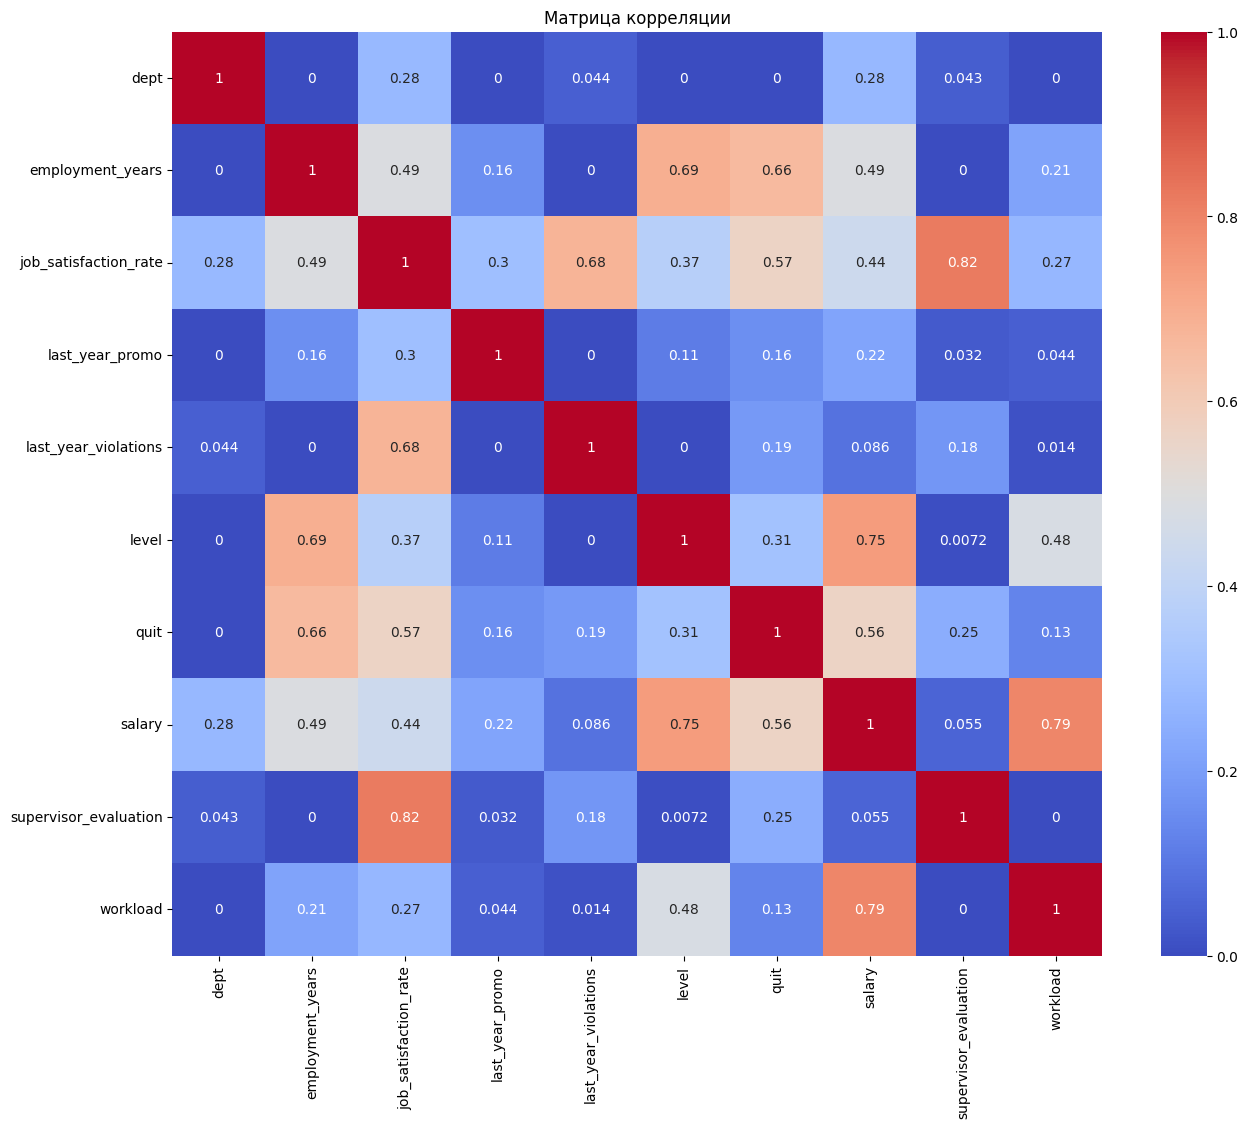

In [73]:
columns_list = train_quit.columns.difference(['id'])

correlation_matrix = train_quit[columns_list].phik_matrix(
    interval_cols=['employment_years','salary','job_satisfaction_rate'])


plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Матрица корреляции')
plt.show()

<div style="border: 2px solid #DABDAB; border-radius: 5px; padding: 10px; color: #45322E; background-color#FFF0FC;">
<p> В данных есть корреляция между целевым признаком и salary, job_satisfaction_rate, employment_years.
    </p>
</div>

/usr/local/lib/python3.10/dist-packages/phik/data_quality.py:82: UserWarning: Not enough unique value for variable quit for analysis 1. Dropping this column
  warnings.warn(


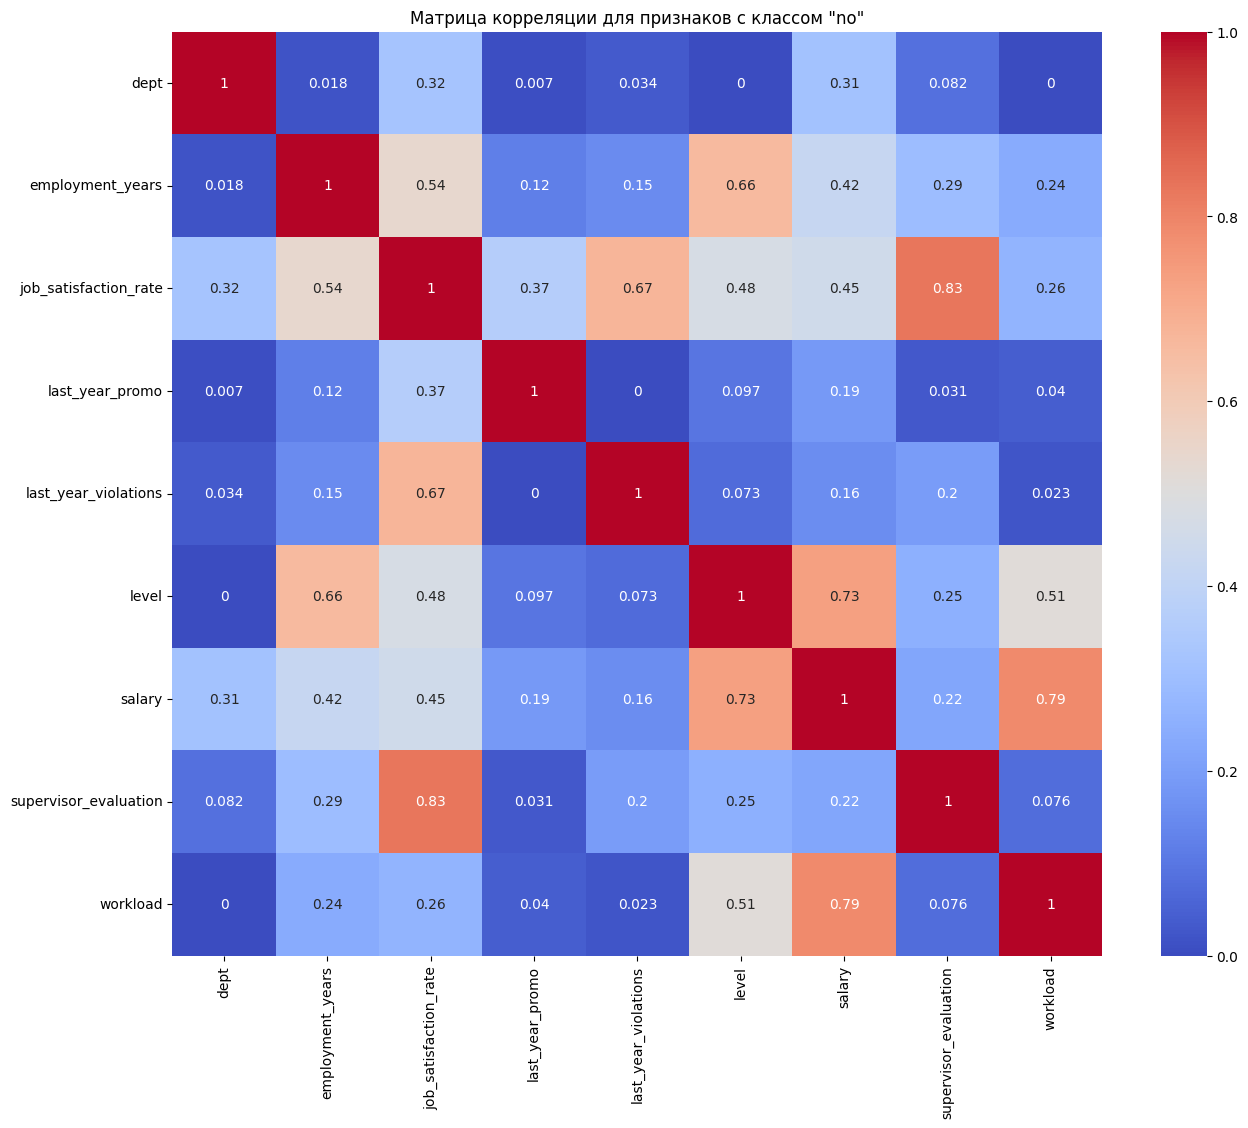

/usr/local/lib/python3.10/dist-packages/phik/data_quality.py:82: UserWarning: Not enough unique value for variable quit for analysis 1. Dropping this column
  warnings.warn(


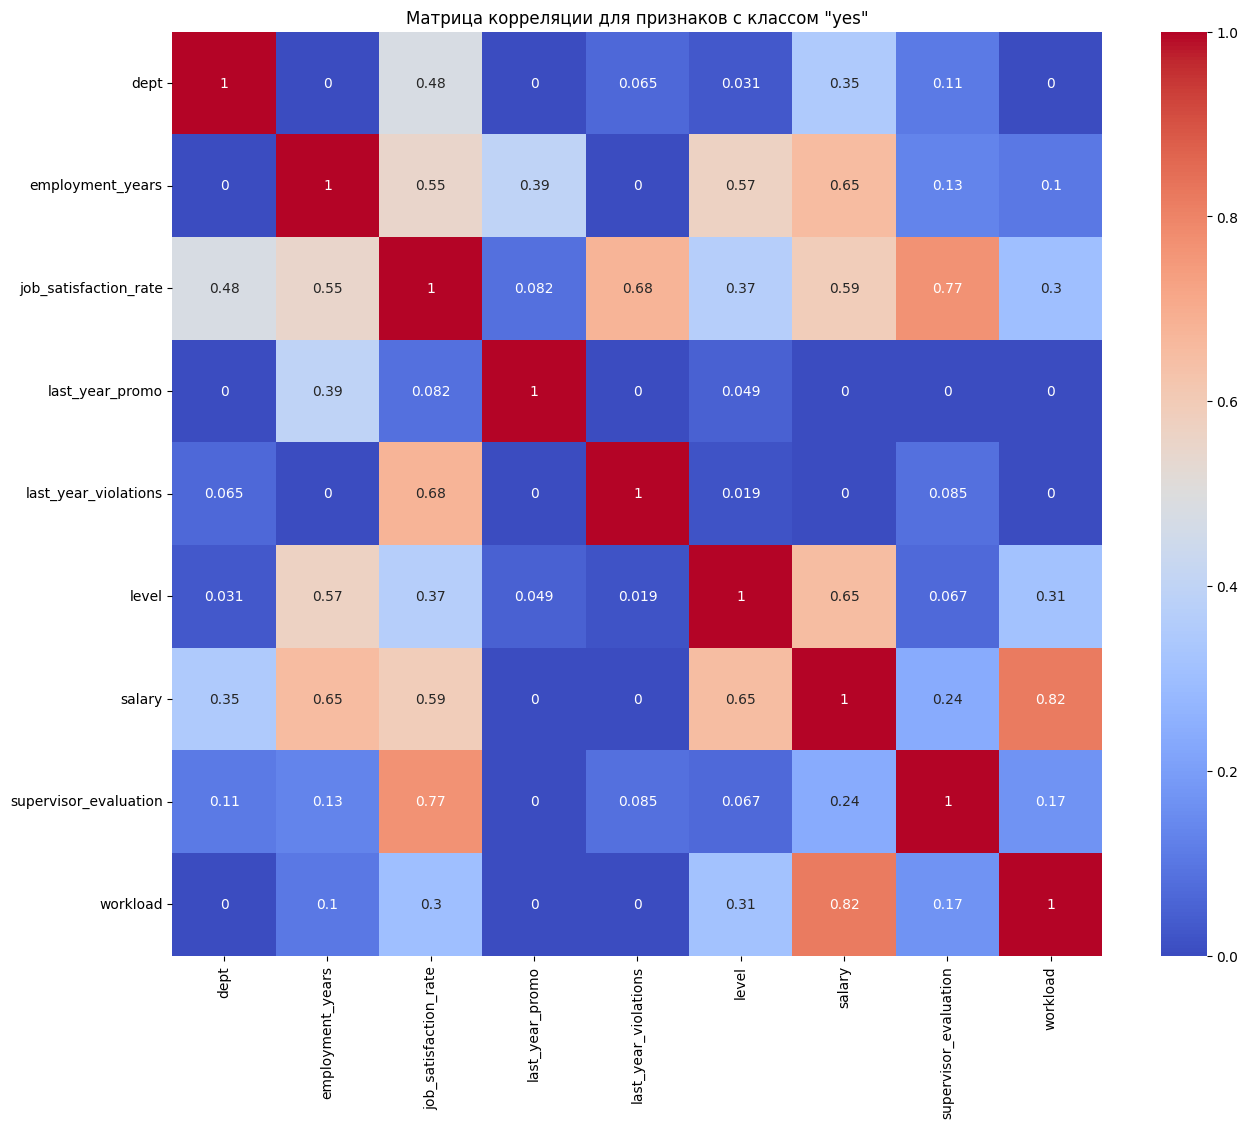

In [74]:
groups = train_quit.groupby('quit')

for cls, group_data in groups:
    correlation_matrix = group_data[columns_list].phik_matrix(
    interval_cols=['employment_years','salary','job_satisfaction_rate'])

    plt.figure(figsize=(15, 12))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title(f'Матрица корреляции для признаков с классом "{cls}"')
    plt.show()

<div style="border: 2px solid #DABDAB; border-radius: 5px; padding: 10px; color: #45322E; background-color#FFF0FC;">
<p> Видно, что большенство признаков оказывают разное влияние между классами. так salary,  и  employment_years оказывают болше влияние на класс yes, а job_satisfaction_rate на класс no.
    </p>
</div>

### Подготовка данных

In [75]:
ohe_columns = ['dept', 'last_year_promo', 'last_year_violations']
ord_columns = ['level','workload']
num_columns = ['employment_years', 'supervisor_evaluation', 'salary', 'job_satisfaction_rate']

In [76]:
ohe_pipe_quit = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore'))
    ]
)


ord_pipe_quit = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    ['junior', 'middle', 'senior'],
                    ['low', 'medium', 'high'],
                ],
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

data_preprocessor_quit = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', MinMaxScaler(), num_columns)
    ],
    remainder='passthrough'
)

pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

param_grid = [

    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 7),
        'models__max_features': range(2, 7),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },

    {
        'models': [LogisticRegression(random_state=RANDOM_STATE, solver='liblinear', penalty='l1')],
        'models__C': range(1, 7),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    }
]

### Обучение модели

In [77]:
train_quit = remove_and_sort_by_id(train_quit.copy())
y_train_quit = train_quit['quit']
X_train_quit = train_quit.drop(['quit'], axis=1)
X_train_quit.shape, y_train_quit.shape

((4000, 9), (4000,))

In [78]:
randomized_search = RandomizedSearchCV(
    pipe_final,
    param_grid,
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1,
    error_score='raise'
)


randomized_search.fit(X_train_quit, y_train_quit)


print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print('Метрика лучшей модели на тренировочной выборке:', randomized_search.best_score_)

X_train_pred = randomized_search.predict_proba(X_train_quit)[:, 1]

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                   

<div style="border: 2px solid #DABDAB; border-radius: 5px; padding: 10px; color: #45322E; background-color#FFF0FC;">
<p> Лучшая модель и её параметры: DecisionTreeClassifier(max_depth=6, max_features=6,random_state=42), Метрика лучшей модели на тренировочной выборке: 0.92, это хороший результат, но возможно на тесте будет ниже. Нужно посмотреть качество моделе на тестовой выборке.  
    </p>
</div>

### Предсказание на тестовой выборке

In [79]:
test_target_quit_id = remove_and_sort_by_id(test_target_quit.copy())
test_features.info()
test_target_quit_id.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 1172 to 1844
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dept                   1998 non-null   object 
 1   level                  1999 non-null   object 
 2   workload               2000 non-null   object 
 3   employment_years       2000 non-null   int64  
 4   last_year_promo        2000 non-null   object 
 5   last_year_violations   2000 non-null   object 
 6   supervisor_evaluation  2000 non-null   int64  
 7   salary                 2000 non-null   int64  
 8   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 156.2+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 1566 to 0
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   quit    2000 non-null   object
dtypes: object(1)
memory usage: 31.2+ KB


In [80]:
X_train_preprocessed = data_preprocessor_quit.fit_transform(X_train_quit)
X_test_preprocessed = data_preprocessor_quit.transform(test_features)

model_tree_cat = DecisionTreeClassifier(max_depth=6, max_features=6,
                                        random_state=42)
model_tree_cat.fit(X_train_preprocessed, y_train_quit)

y_test_pred = model_tree_cat.predict_proba(X_test_preprocessed)[:, 1]

roc_auc = roc_auc_score(test_target_quit_id, y_test_pred)
print('Метрика ROC-AUC на тестовой выборке:', roc_auc)

Метрика ROC-AUC на тестовой выборке: 0.9131508178747111


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [81]:
model_log = LogisticRegression(random_state=RANDOM_STATE, solver='liblinear', penalty='l1')
model_log.fit(X_train_preprocessed, y_train_quit)

y_test_pred = model_log.predict_proba(X_test_preprocessed)[:, 1]

roc_auc = roc_auc_score(test_target_quit_id, y_test_pred)
print('Метрика ROC-AUC на тестовой выборке:', roc_auc)

Метрика ROC-AUC на тестовой выборке: 0.90591168829886


<div style="border: 2px solid #DABDAB; border-radius: 5px; padding: 10px; color: #45322E; background-color#FFF0FC;">
<p>  На тестовой выборке предсказывает 0.90 по метрике ROC-AUC, что говорит о хорошем качестве модели.  Для модели логистической регрессии значение немного ниже, следовательно они незначительно различаются.
    </p>
</div>

### Выводы

1. Предобработка данных:
 * Применяется механизм One-Hot Encoding для категориальных признаков ('dept', 'last_year_promo', 'last_year_violations'), с игнорированием неизвестных категорий.
 * Применяется Ordinal Encoding для признаков 'level' и 'workload', с использованием 'most_frequent' стратегии для заполнения пропущенных значений.
 * Числовые признаки ('employment_years', 'supervisor_evaluation', 'salary') стандартизированы с использованием StandardScaler.
2. Классификатор:
 * Используется модель DecisionTreeClassifier с ограничением глубины до 6 и максимальным количеством признаков для разделения равным 6. Метрика точности на тренировочной выборке составляет примерно 92.24%.


Основные преимущества данной модели:
 * Учет особенностей дерева решений, таких как ограничение глубины и количества признаков для разделения, что может помочь в борьбе с переобучением, так же она имеет интерпретируемость модели лучше чем у логистической регрессии, сотрудникам HR компании будет легче поннять как работает данная модель.  

## Общий вывод

**Задача 1: предсказание уровня удовлетворённости сотрудника**
* Загрузка данных:
    Данные были успешно загружены из предоставленных источников.

* Предобработка данных:
    Были выполнены следующие шаги по предобработке данных:
- Поиск и обработка дубликатов.
- Пропущенные значения были обработаны в пайплайне.

* Исследовательский анализ данных:
Проведен анализ числовых и категориальных данных, включая исследование корреляций между признаками. Анализ показал наличие зависимостей целевого признака от входных.

* Подготовка данных:
Данные были подготовлены для обучения моделей машинного обучения, включая масштабирование числовых признаков и кодировку категориальных.

* Обучение модели:
Были обучены несколько моделей машинного обучения, для задачи регрессии в данном задании лушче всего себя показала модель DecisionTreeRegressor с гиперпараметрами (max_depth=10, min_samples_leaf=10, min_samples_split=5) метрика SMAPE показывает 14.8,


Был проведен анализ важности признаков для модели DecisionTreeRegressor, чтобы определить, какие признаки оказывают наибольшее влияние на уровень удовлетворённости сотрудника.
По результатам анализа были сделаны выводы о работе модели и её применимости для прогнозирования уровня удовлетворённости сотрудников в компании.


**Задача 2: предсказание увольнения сотрудника из компании**

* Загрузка данных:
Данные были загружены и подготовлены для анализа.

* Предобработка данных:
Были выполнены шаги по предобработке данных, включая поиск и обработку дубликатов.

* Исследовательский анализ данных:
Проведен анализ числовых и категориальных данных, включая оценку длительности работы в компании и других факторов, влияющих на увольнение сотрудника. Так же проведен корреляционный анализ, как общий так и для классов целевой переменной.

* Добавление нового входного признака:
Был добавлен новый признак, который может оказать влияние на вероятность увольнения сотрудника.

* Подготовка данных:
Данные были подготовлены для обучения модели машинного обучения, включая масштабирование числовых признаков и кодировку категориальных.

* Обучение модели:
Были обучены несколько моделей машинного обучения, для задачи классификации была найдена лучшая модель и её параметры: DecisionTreeClassifier(max_depth=6, max_features=6,random_state=42), Метрика лучшей модели на тренировочной выборке: 0.92.
Модель была протестирована на тестовой выборке, и были получены предсказания.
Были сделаны выводы о работе модели и её применимости для прогнозирования увольнения сотрудников из компании.



В рамках проекта были построены модели машинного обучения для прогнозирования уровня удовлетворённости сотрудников и вероятности их увольнения из компании. Модели показали хорошие результаты на тестовой выборке, что говорит о их применимости для прогнозирования и оптимизации управления персоналом в компании "Работа с Заботой".

На основе полученных результатов были подготовлены следующие рекомендации:

1. Рабочая загруженность сотрудников оказывает значительное влияние на их удовлетворенность. На основе анализа распределения загрузки сотрудников предлагается оптимизировать процессы управления персоналом, чтобы более эффективно распределять нагрузку между сотрудниками. Это может повысить общий уровень удовлетворенности и производительности в компании.

2. Обнаружена высокая корреляция между уровнем удовлетворенности сотрудников и оценкой, которую они получили от руководителя. Для улучшения уровня удовлетворенности сотрудников следует обратить внимание на процессы оценки и обратной связи со стороны руководства. Регулярные обзоры и поддержка со стороны руководства могут содействовать повышению мотивации и удовлетворенности сотрудников.

3. При анализе увольнения сотрудников выявлено, что отдел технологий имеет самую высокую долю ушедших сотрудников. Это свидетельствует о необходимости более внимательного управления и поддержки этого отдела. Также стоит обратить внимание на отдел HR, где наблюдается наименьшая медианная удовлетворенность. Оптимизация процессов управления персоналом и повышение вовлеченности HR-специалистов могут способствовать улучшению ситуации в этой области и снижению текучести кадров.